# Energy Consumption and Production Analysis, Predictions with Bayesian Model.

## *Data set*
It is the Hourly timeseries data of electricity consumption and production (with production type) in Romania.

In this dataset, It includes the hourly consumption and production, and the production is split in one of the categories: Nuclear, Wind, Hydroelectric, Oil and Gas, Coal, Solar, Biomass. data from January 1st, 2019 to march 3rd, 2023.

The 'DateTime' column details the timestamps for each record, giving us a clear temporal understanding of energy trends. The 'Consumption' column quantifies the total energy consumed during these hourly intervals, while the 'Production' column outlines the total energy generated in the same periods. All values are in MWs.

Each row represents a specific hour, providing a comprehensive view of energy dynamics throughout the day.

source: https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production

Importing the necessary libraries for data manipulation and visualizations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading a CSV file containing electricity consumption and production data into a Pandas DataFrame for analysis.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Copy of electricityConsumptionAndProduction.csv", parse_dates=['DateTime'], dayfirst=True)
df.head()

DateTime  Consumption  Production  Nuclear  Wind  Hydroelectric  \
0 2019-01-01 00:00:00         6352        6527     1395    79           1383   
1 2019-01-01 01:00:00         6116        5701     1393    96           1112   
2 2019-01-01 02:00:00         5873        5676     1393   142           1030   
3 2019-01-01 03:00:00         5682        5603     1397   191            972   
4 2019-01-01 04:00:00         5557        5454     1393   159            960   

   OilandGas  Coal  Solar  Biomass  
0       1896  1744      0       30  
1       1429  1641      0       30  
2       1465  1616      0       30  
3       1455  1558      0       30  
4       1454  1458      0       30

## *Exploratory Data Analysis*

Quick overview of the DataFrame's structure and content

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       36772 non-null  datetime64[ns]
 1   Consumption    36772 non-null  int64         
 2   Production     36772 non-null  int64         
 3   Nuclear        36772 non-null  int64         
 4   Wind           36772 non-null  int64         
 5   Hydroelectric  36772 non-null  int64         
 6   OilandGas      36772 non-null  int64         
 7   Coal           36772 non-null  int64         
 8   Solar          36772 non-null  int64         
 9   Biomass        36772 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 2.8 MB


Checking if there are any null values

In [ ]:
df.isnull().sum(axis=0)

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
OilandGas        0
Coal             0
Solar            0
Biomass          0
dtype: int64

Checking the summary statistics of the numerical columns within the DataFrame

In [ ]:
df.describe()

Consumption    Production       Nuclear          Wind  Hydroelectric  \
count  36772.000000  36772.000000  36772.000000  36772.000000   36772.000000   
mean    6707.924889   6543.770478   1293.468590    785.953878    1801.603149   
std     1034.961146   1005.486125    237.348752    681.217001     678.981785   
min     4081.000000   3315.000000    612.000000      1.000000     175.000000   
25%     5895.750000   5833.000000   1349.000000    226.000000    1310.000000   
50%     6686.000000   6492.000000   1386.000000    577.000000    1708.000000   
75%     7434.000000   7210.000000   1409.000000   1195.250000    2184.000000   
max     9615.000000   9886.000000   1457.000000   2811.000000    4359.000000   

          OilandGas          Coal         Solar       Biomass  
count  36772.000000  36772.000000  36772.000000  36772.000000  
mean    1181.630017   1270.038236    151.524094     58.730828  
std      422.487653    306.550193    222.768784     13.363835  
min      213.000000    279.000000      0.000000     18.000000  
25%      881.000000   1080.000000      0.000000     49.000000  
50%     1216.000000   1254.000000      2.000000     61.000000  
75%     1502.000000   1467.000000    268.000000     68.000000  
max     2141.000000   2537.000000    869.000000     89.000000

Generating histograms in the DataFrame using Matplotlib and Seaborn libraries to visualize the distributions and frequency of values to understanding the data's characteristics and potential insights.

<Figure size 1200x800 with 0 Axes>

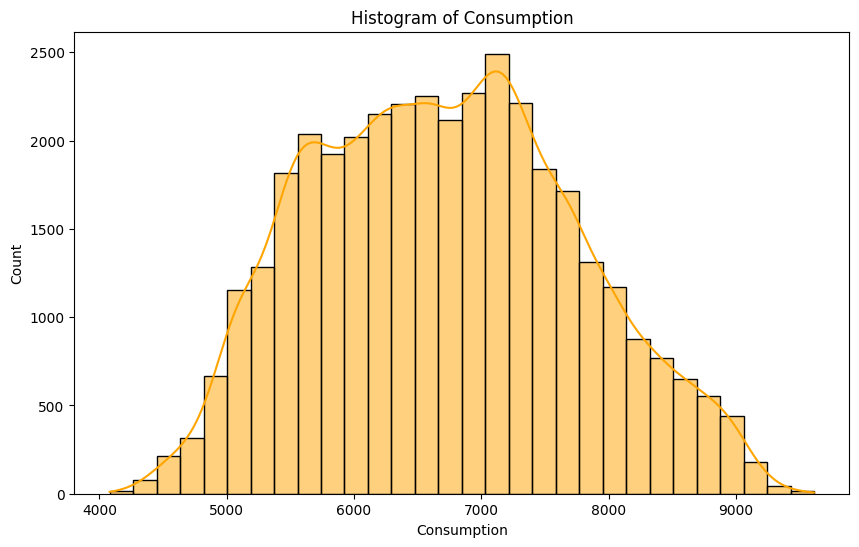

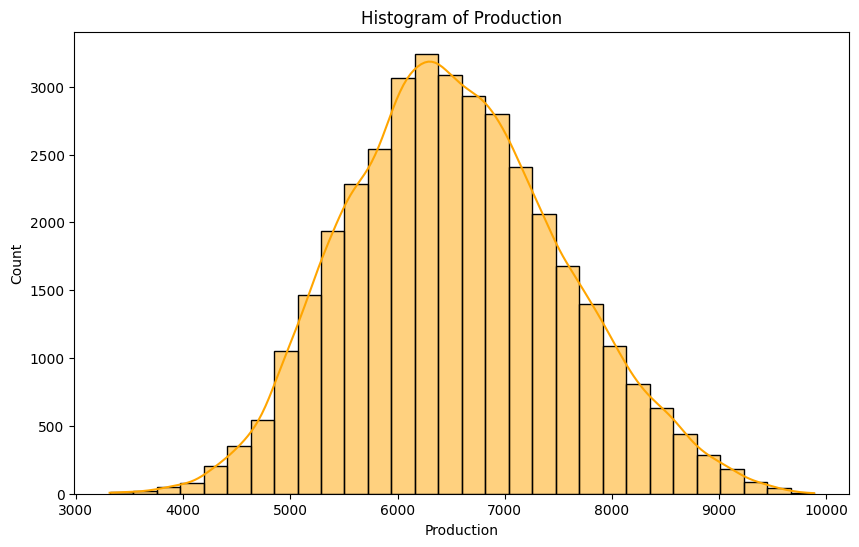

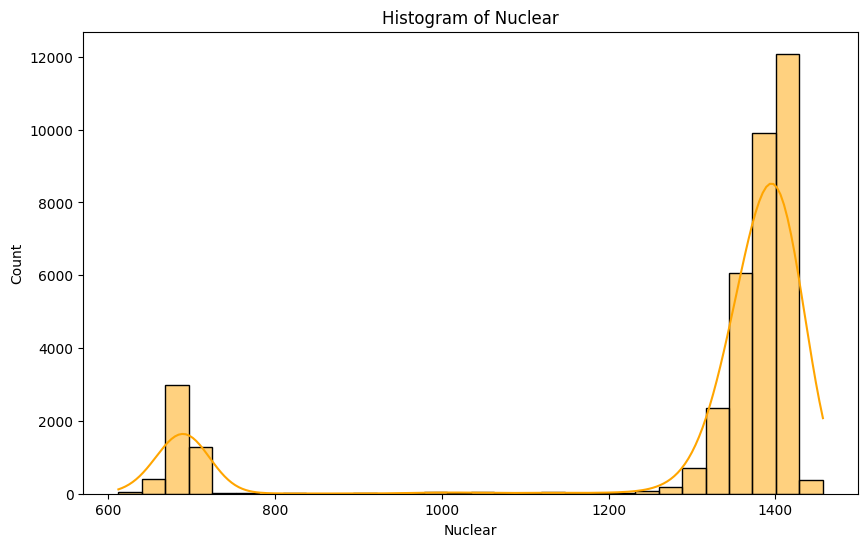

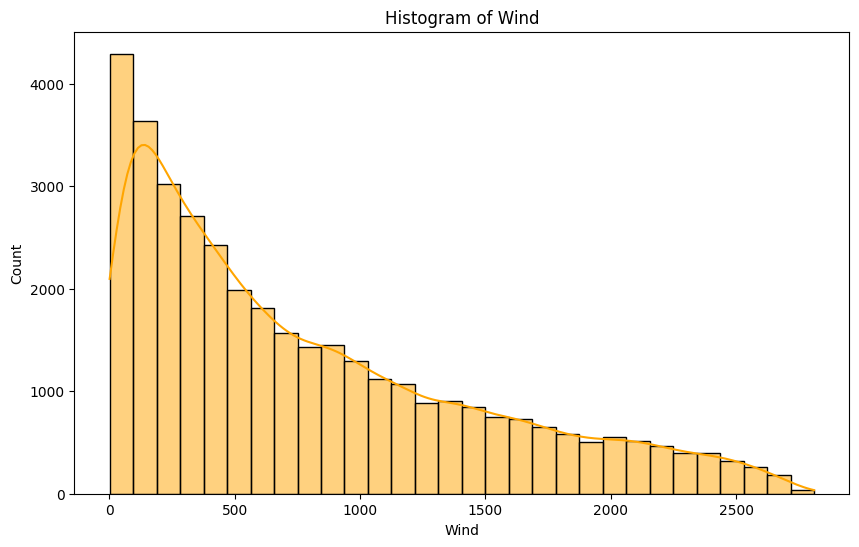

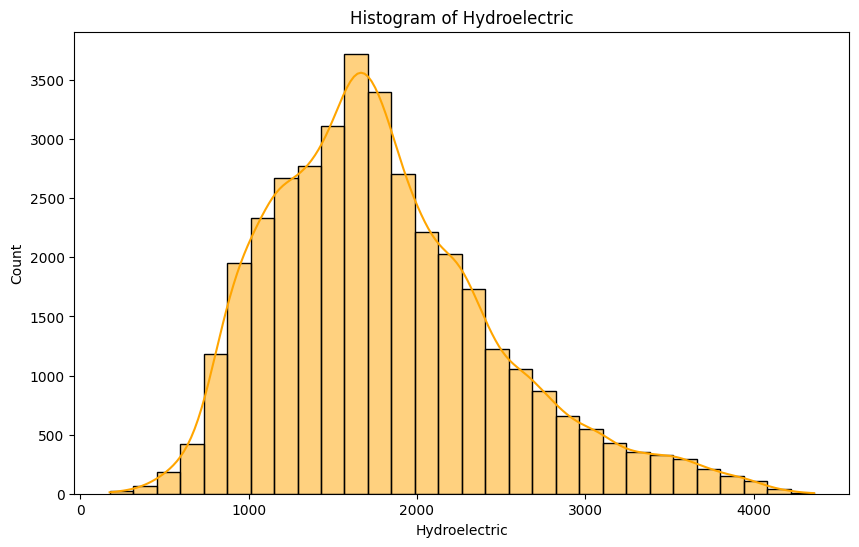

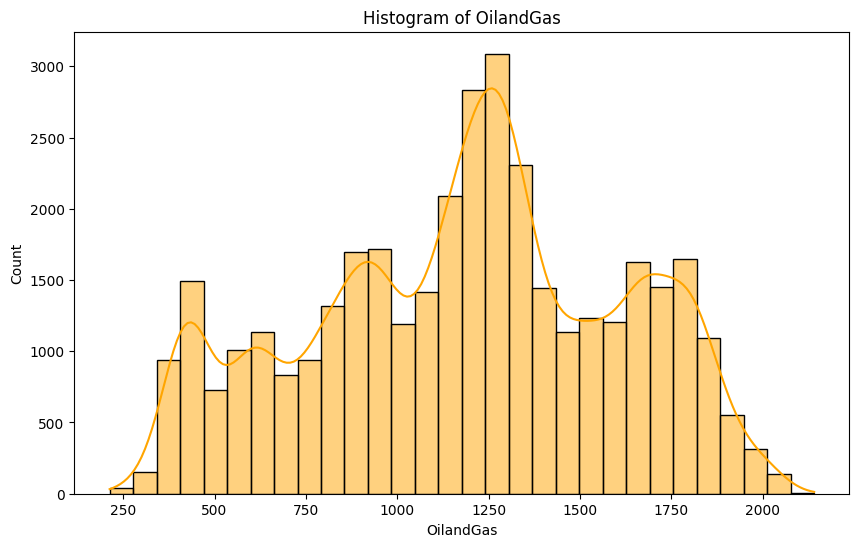

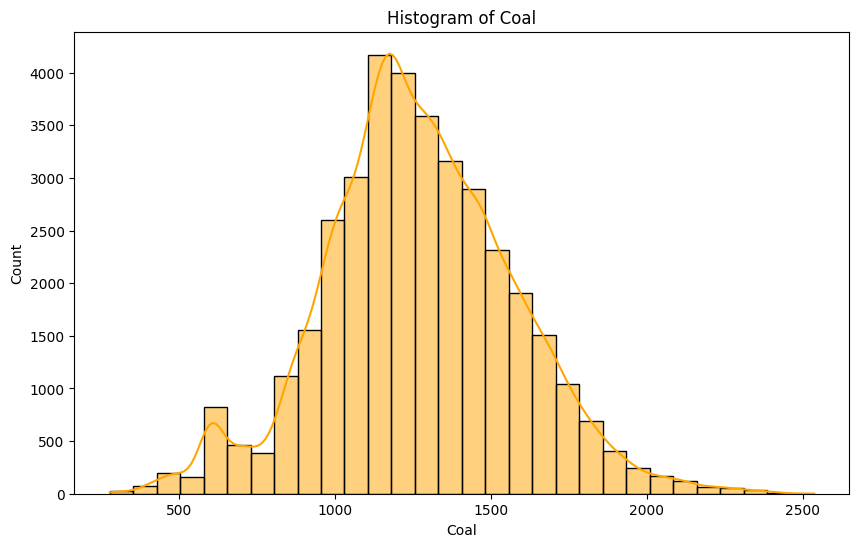

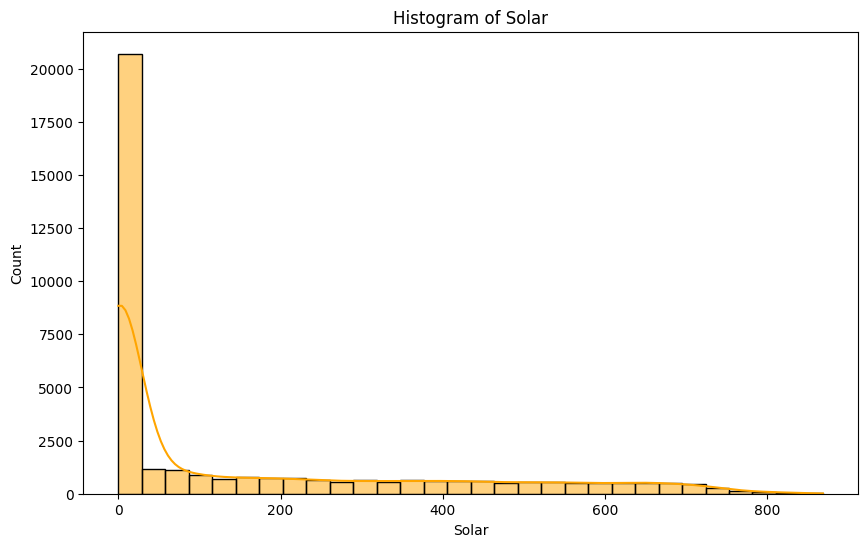

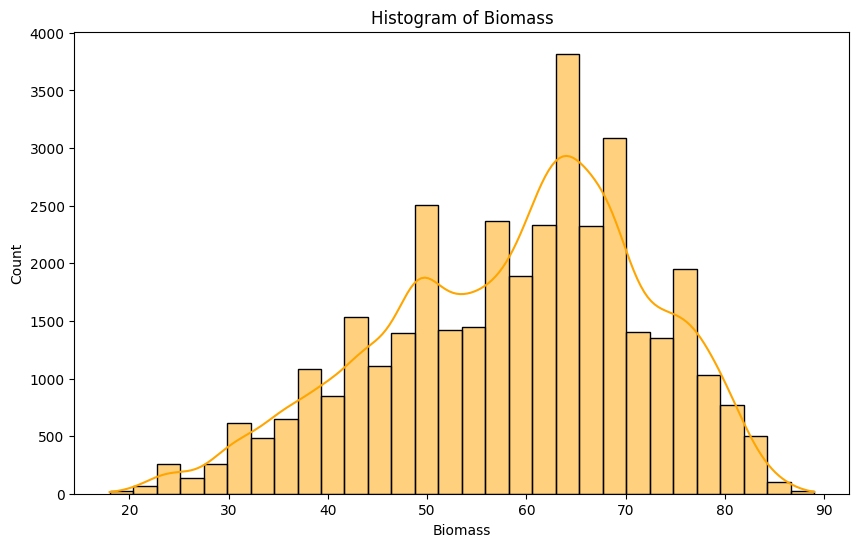

In [ ]:
plt.figure(figsize=(12, 8))
for column in df.columns[1:10]:
    plt.figure(figsize=(10,6))
    sns.histplot(df[column], kde=True, bins=30, color='orange')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## *Electricity Consumption Trends, Visualizations over time & Analysis*

Let's look into the Consumption trends over time.

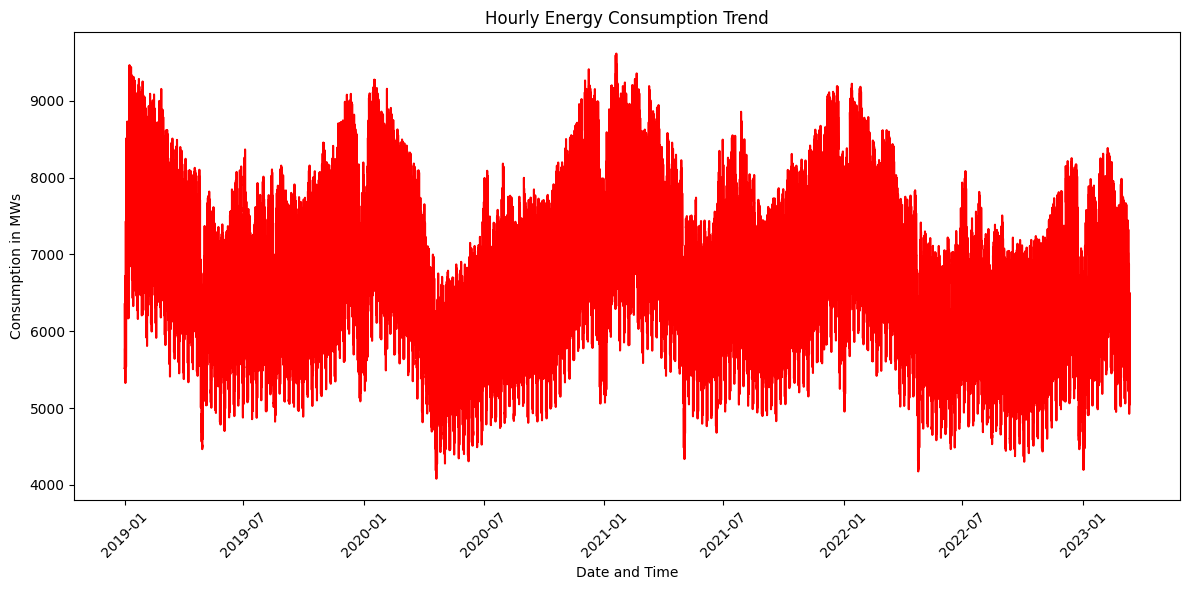

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Consumption'] , color='red')
plt.title('Hourly Energy Consumption Trend')
plt.xlabel('Date and Time')
plt.ylabel('Consumption in MWs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Diffentiating the visualizations for each year. This visualization allows for a clear comparison of energy consumption patterns across different years.

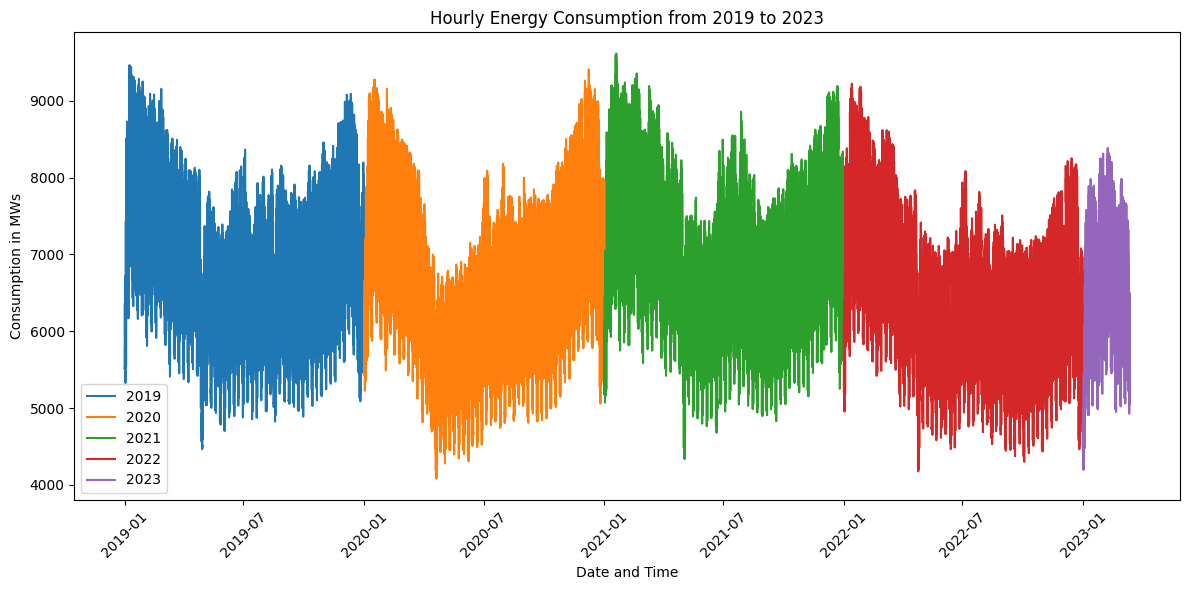

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter data for the years 2019 through 2023
df_2019 = df[df['DateTime'].dt.year == 2019]
df_2020 = df[df['DateTime'].dt.year == 2020]
df_2021 = df[df['DateTime'].dt.year == 2021]
df_2022 = df[df['DateTime'].dt.year == 2022]
df_2023 = df[df['DateTime'].dt.year == 2023]

# Create line plots for the years 2019 through 2023
plt.figure(figsize=(12, 6))
plt.plot(df_2019['DateTime'], df_2019['Consumption'], linestyle='-', label='2019')
plt.plot(df_2020['DateTime'], df_2020['Consumption'], linestyle='-', label='2020')
plt.plot(df_2021['DateTime'], df_2021['Consumption'], linestyle='-', label='2021')
plt.plot(df_2022['DateTime'], df_2022['Consumption'], linestyle='-', label='2022')
plt.plot(df_2023['DateTime'], df_2023['Consumption'], linestyle='-', label='2023')
plt.title('Hourly Energy Consumption from 2019 to 2023')
plt.xlabel('Date and Time')
plt.ylabel('Consumption in MWs')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Plotting the Consumption trends for each year separetly

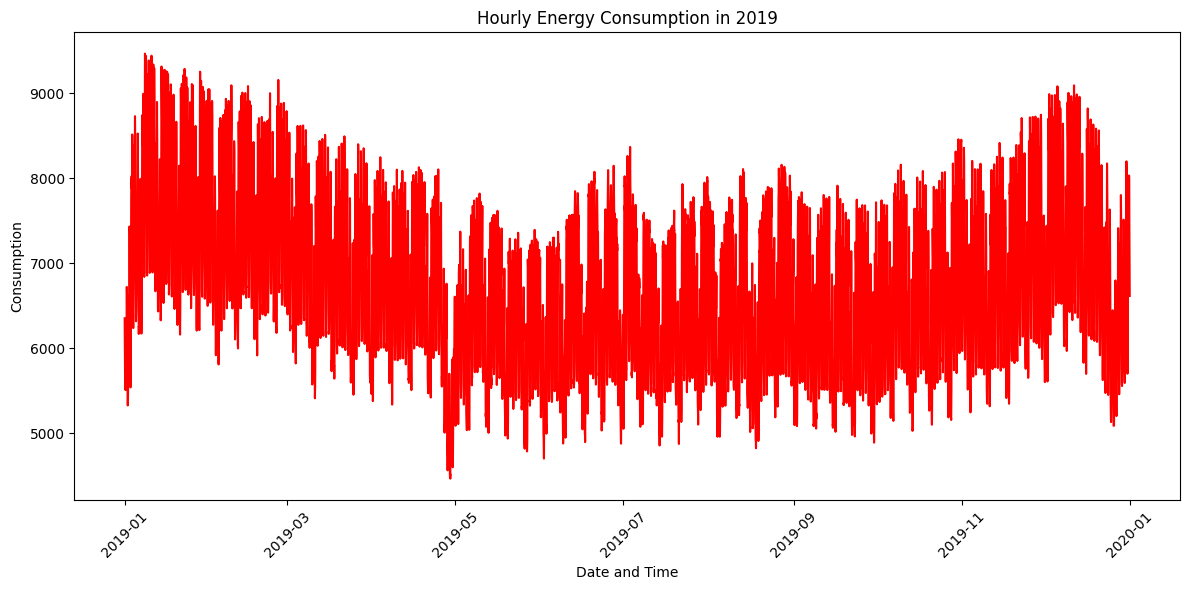

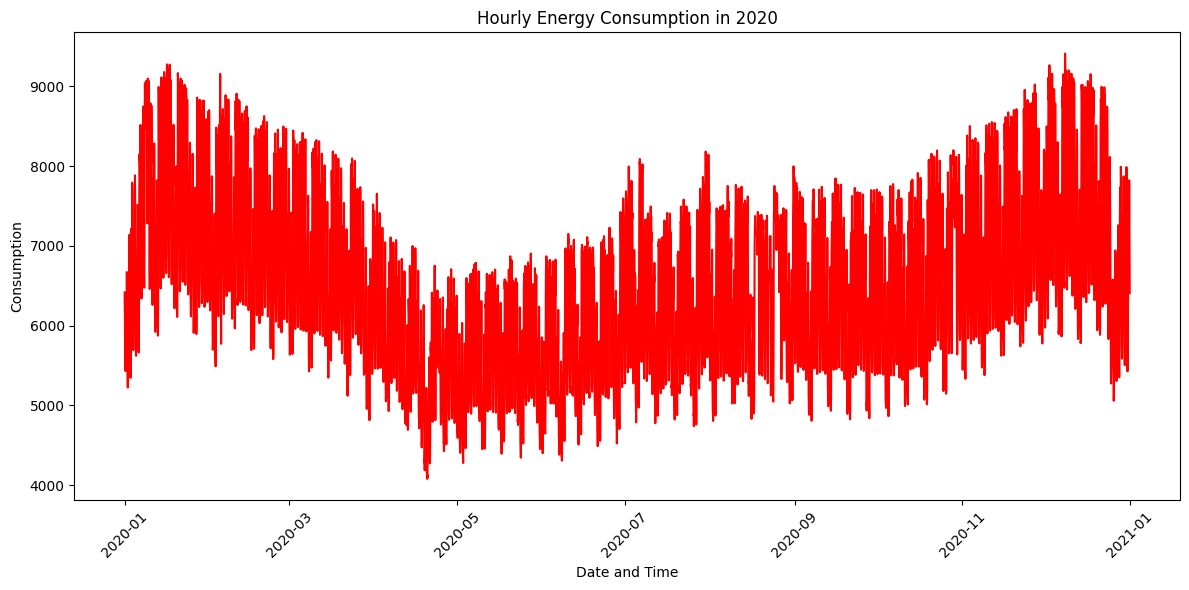

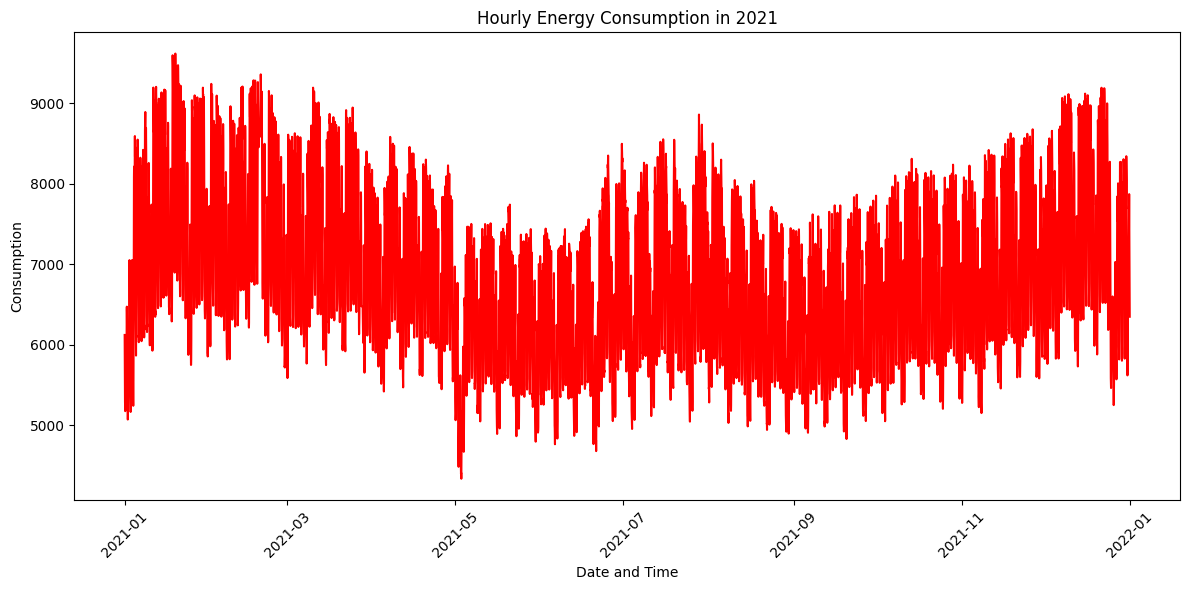

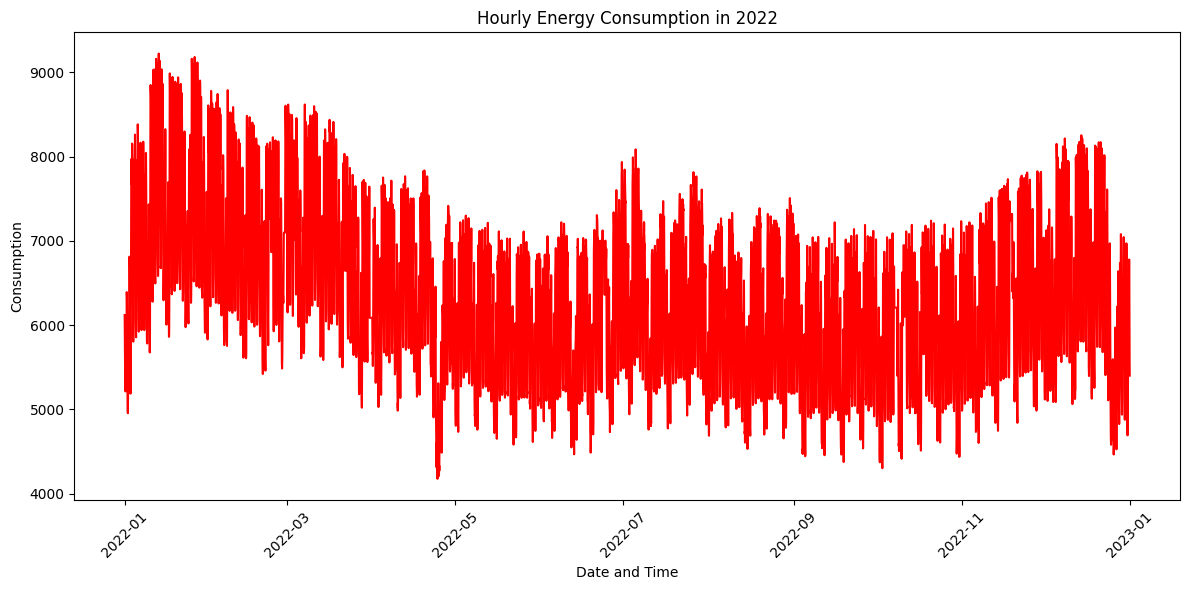

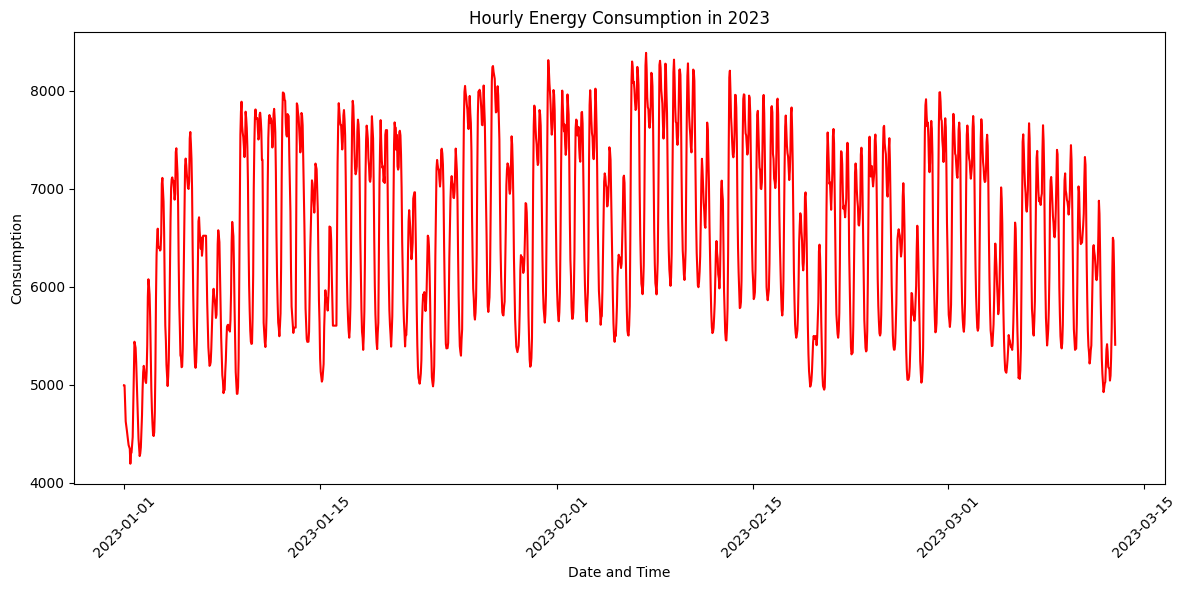

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Create a loop to plot hourly energy consumption for each year from 2019 to 2023
for year in range(2019, 2024):
    # Filter data for the current year
    df_year = df[df['DateTime'].dt.year == year]

    # Create a line plot for the current year
    plt.figure(figsize=(12, 6))
    plt.plot(df_year['DateTime'], df_year['Consumption'], color='red')
    plt.title(f'Hourly Energy Consumption in {year}')
    plt.xlabel('Date and Time')
    plt.ylabel('Consumption')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Print the mean consumptions for each Month for each Year

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extracting year and month from the 'DateTime' column
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Grouping by year and month, calculating the mean consumption for each group
monthly_mean_consumption = df.groupby(['Year', 'Month'])['Consumption'].mean().reset_index()

# Displaying mean consumptions for each month in a year
for year in monthly_mean_consumption['Year'].unique():
    print(f"Year: {year}")
    yearly_data = monthly_mean_consumption[monthly_mean_consumption['Year'] == year]
    for month in range(1, 13):
        mean_consumption = yearly_data[yearly_data['Month'] == month]['Consumption'].values
        if len(mean_consumption) > 0:
            print(f"Month: {month}, Mean Consumption: {mean_consumption[0]}")

Year: 2019
Month: 1, Mean Consumption: 7752.168010752688
Month: 2, Mean Consumption: 7605.071428571428
Month: 3, Mean Consumption: 6992.792732166891
Month: 4, Mean Consumption: 6652.491666666667
Month: 5, Mean Consumption: 6379.282258064516
Month: 6, Mean Consumption: 6495.8069444444445
Month: 7, Mean Consumption: 6598.635752688172
Month: 8, Mean Consumption: 6601.30376344086
Month: 9, Mean Consumption: 6416.876388888889
Month: 10, Mean Consumption: 6642.703753351207
Month: 11, Mean Consumption: 7027.477777777778
Month: 12, Mean Consumption: 7193.9112903225805
Year: 2020
Month: 1, Mean Consumption: 7495.682795698925
Month: 2, Mean Consumption: 7313.755747126437
Month: 3, Mean Consumption: 6744.886944818304
Month: 4, Mean Consumption: 5690.484722222222
Month: 5, Mean Consumption: 5660.8696236559135
Month: 6, Mean Consumption: 5972.0569444444445
Month: 7, Mean Consumption: 6458.549731182796
Month: 8, Mean Consumption: 6491.861559139785
Month: 9, Mean Consumption: 6429.9111111111115
Month

Visualize the monthly average energy consumption across each of the years.

Month           1            2            3            4            5   \
Year                                                                     
2019   7752.168011  7605.071429  6992.792732  6652.491667  6379.282258   
2020   7495.682796  7313.755747  6744.886945  5690.484722  5660.869624   
2021   7510.767473  7673.992560  7413.022880  6953.769444  6257.135753   
2022   7392.741935  7204.022321  6963.604307  6287.465278  6037.829301   
2023   6447.860215  6736.520833  6336.017361          NaN          NaN   

Month           6            7            8            9            10  \
Year                                                                     
2019   6495.806944  6598.635753  6601.303763  6416.876389  6642.703753   
2020   5972.056944  6458.549731  6491.861559  6429.911111  6596.198391   
2021   6489.315278  6930.137097  6610.645161  6421.556944  6722.093834   
2022   6145.455556  6398.317204  6132.736559  5869.384722  5844.883378   
2023           NaN          NaN      

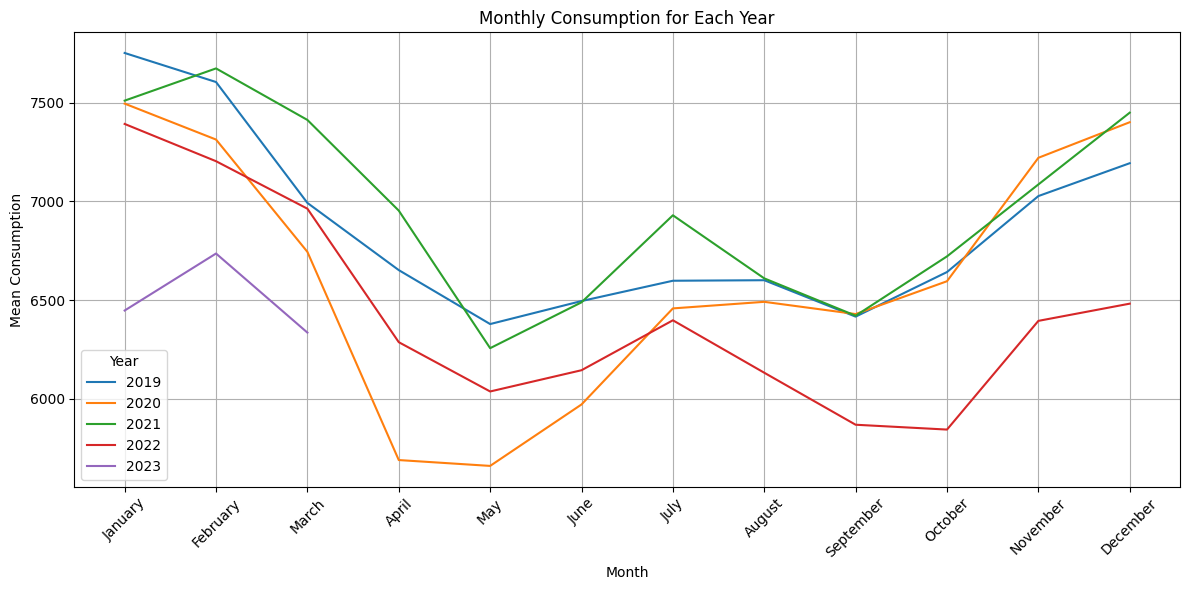

In [ ]:
import calendar

df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extracting monthly information and mean consumption for each year
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
monthly_consumption = df.groupby(['Year', 'Month'])['Consumption'].mean().unstack()
print(monthly_consumption)

# Plotting line graph for monthly consumption for each year
plt.figure(figsize=(12, 6))
for year in monthly_consumption.index:
    plt.plot(monthly_consumption.columns, monthly_consumption.loc[year], label=str(year))

# Replace numeric x-axis ticks with month names
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])

plt.title('Monthly Consumption for Each Year')
plt.xlabel('Month')
plt.ylabel('Mean Consumption')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Mean consumption for each Month across all years and a line plot illustrating the Monthly Mean consumption trends across all years

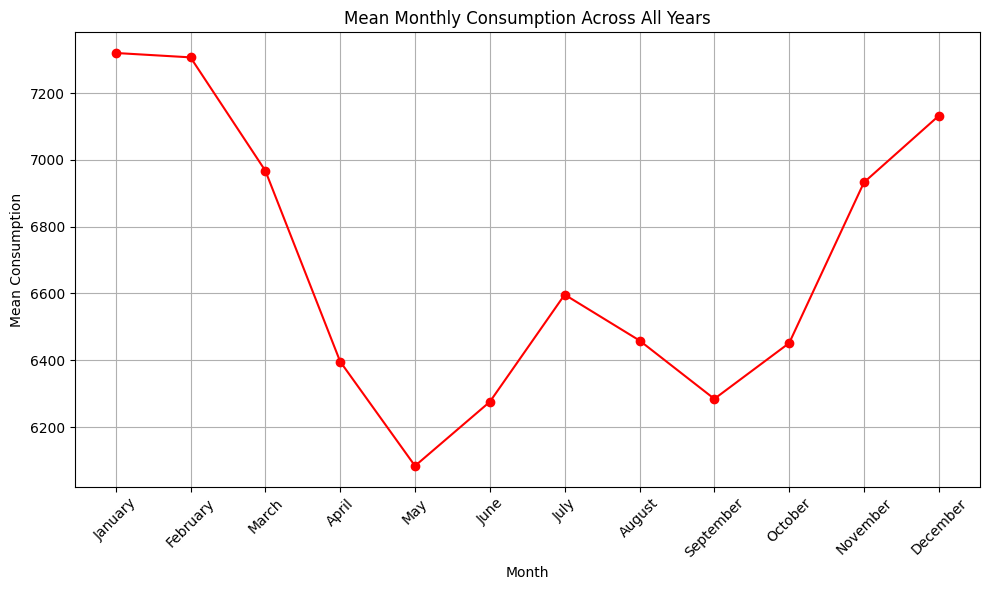

In [ ]:
# Extracting 'Month' and 'Year' information
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year

# Calculating mean consumption for each month across all years
mean_monthly_consumption = df.groupby('Month')['Consumption'].mean()

# Plotting line graph for mean monthly consumption across all years
plt.figure(figsize=(10, 6))
plt.plot(mean_monthly_consumption.index, mean_monthly_consumption.values, marker='o', linestyle='-', color='red')
plt.title('Mean Monthly Consumption Across All Years')
plt.xlabel('Month')
plt.ylabel('Mean Consumption')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)])  # Setting month names as x-axis ticks
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Printing the mean consumptions for each Hour for each Year

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Extract 'Year' and 'Hour' information from 'DateTime' column
df['Year'] = df['DateTime'].dt.year
df['Hour'] = df['DateTime'].dt.hour

# Calculate mean consumption for each hour for each year
hourly_mean_consumption_each_year = df.groupby(['Year', 'Hour'])['Consumption'].mean().reset_index()

# Display mean consumptions for each hour for each year
for year in hourly_mean_consumption_each_year['Year'].unique():
    print(f"Year: {year}")
    yearly_data = hourly_mean_consumption_each_year[hourly_mean_consumption_each_year['Year'] == year]
    for hour in range(24):
        mean_consumption = yearly_data[yearly_data['Hour'] == hour]['Consumption'].values
        if len(mean_consumption) > 0:
            print(f"Hour: {hour}, Mean Consumption: {mean_consumption[0]}")

Year: 2019
Hour: 0, Mean Consumption: 6097.668493150685
Hour: 1, Mean Consumption: 5886.920547945206
Hour: 2, Mean Consumption: 5766.580821917808
Hour: 3, Mean Consumption: 5717.234972677596
Hour: 4, Mean Consumption: 5751.090410958904
Hour: 5, Mean Consumption: 5869.328767123287
Hour: 6, Mean Consumption: 6202.641095890411
Hour: 7, Mean Consumption: 6779.153424657534
Hour: 8, Mean Consumption: 7213.780821917808
Hour: 9, Mean Consumption: 7398.446575342466
Hour: 10, Mean Consumption: 7410.364383561644
Hour: 11, Mean Consumption: 7357.369863013699
Hour: 12, Mean Consumption: 7326.3369863013695
Hour: 13, Mean Consumption: 7343.61095890411
Hour: 14, Mean Consumption: 7229.413698630137
Hour: 15, Mean Consumption: 7162.550684931507
Hour: 16, Mean Consumption: 7197.931506849315
Hour: 17, Mean Consumption: 7357.293150684932
Hour: 18, Mean Consumption: 7460.295890410959
Hour: 19, Mean Consumption: 7574.243835616438
Hour: 20, Mean Consumption: 7628.1972602739725
Hour: 21, Mean Consumption: 7478

Line plot illustrating the hourly consumption trends for each year.

Year             2019         2020         2021         2022         2023
DateTime                                                                 
0         6097.668493  5882.904372  6165.208219  5719.008219  5717.352113
1         5886.920548  5676.718579  5938.484932  5515.397260  5535.690141
2         5766.580822  5564.303279  5821.295890  5397.290411  5434.619718
3         5717.234973  5513.305177  5758.510929  5344.275956  5390.281690
4         5751.090411  5538.737705  5791.934247  5371.435616  5447.816901
5         5869.328767  5636.696721  5906.164384  5473.876712  5593.436620
6         6202.641096  5930.382514  6233.827397  5785.863014  5987.830986
7         6779.153425  6482.224044  6837.868493  6332.052055  6549.028169
8         7213.780822  6942.284153  7322.495890  6759.046575  7005.394366
9         7398.446575  7153.224044  7551.032877  6950.676712  7204.014085
10        7410.364384  7182.270492  7584.046575  6966.586301  7175.760563
11        7357.369863  7154.808743  75

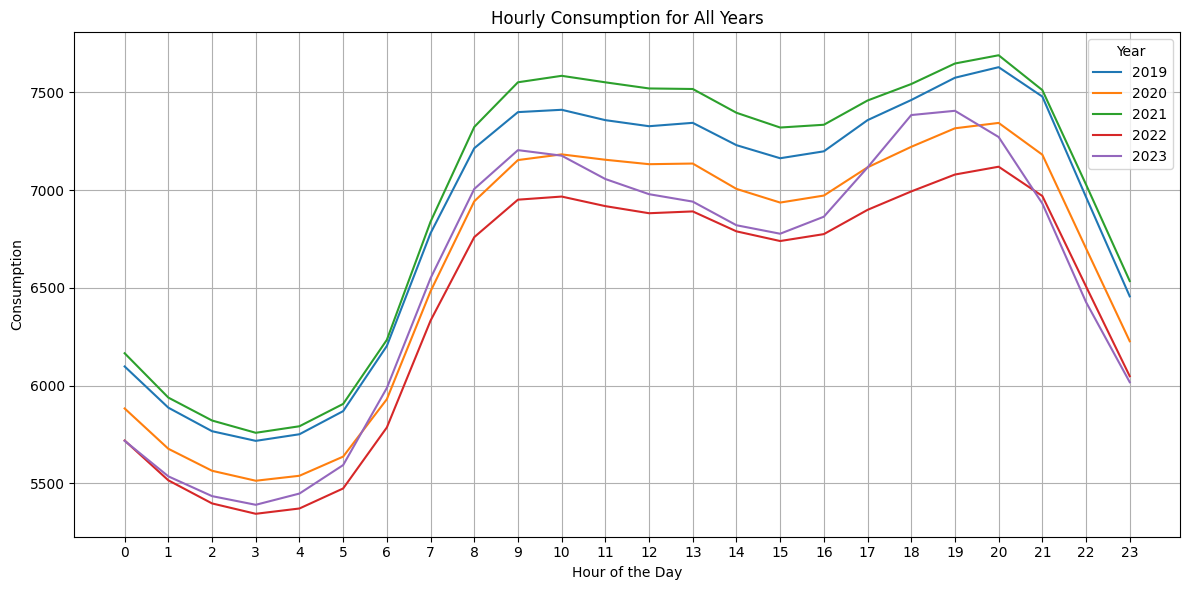

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extracting hourly information and mean consumption for each year
df['Year'] = df['DateTime'].dt.year
hourly_consumption = df.pivot_table(index=df['DateTime'].dt.hour, columns='Year', values='Consumption', aggfunc='mean')
print(hourly_consumption)

# Plotting line graph for hourly consumption for all years
plt.figure(figsize=(12, 6))
for year in hourly_consumption.columns:
    plt.plot(hourly_consumption.index, hourly_consumption[year], label=str(year))

# Set x-axis ticks to show all 24 hours
plt.xticks(range(24))

plt.title('Hourly Consumption for All Years')
plt.xlabel('Hour of the Day')
plt.ylabel('Consumption')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Line plot illustrating the hourly Mean consumption trends across all years

Hour
0     5954.610313
1     5744.194517
2     5627.923629
3     5574.362630
4     5605.581593
5     5715.525457
6     6035.774804
7     6605.017624
8     7056.822454
9     7260.523499
10    7280.648825
11    7236.339426
12    7203.819191
13    7208.513708
14    7091.472585
15    7027.055483
16    7059.889687
17    7203.081593
18    7307.661880
19    7404.032637
20    7436.830287
21    7268.278721
22    6782.798303
23    6302.398172
Name: Consumption, dtype: float64


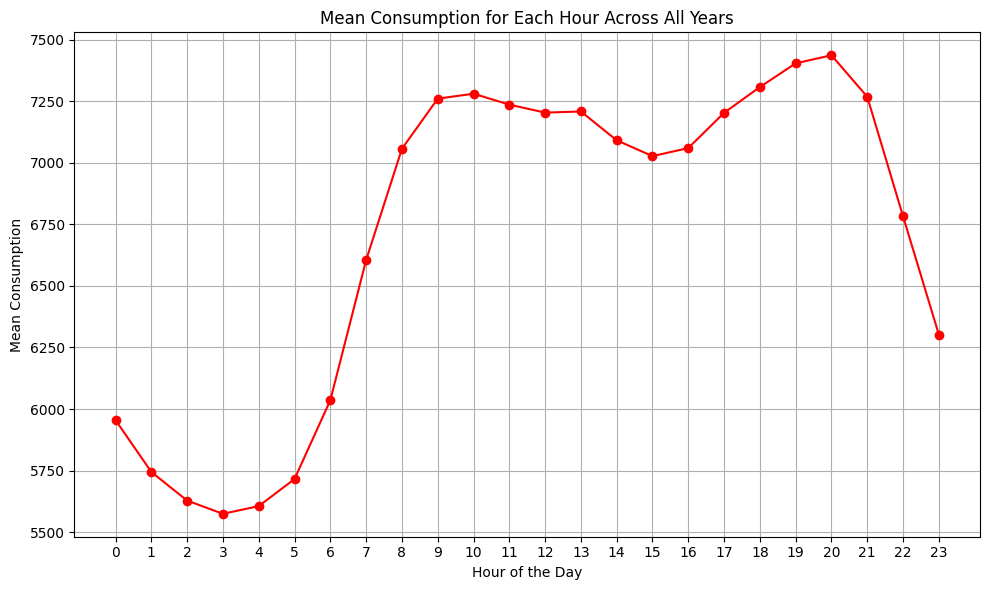

In [ ]:
# Extract 'Hour' information from 'DateTime' column
df['Hour'] = df['DateTime'].dt.hour

# Calculate mean consumption for each hour across all years
hourly_mean_consumption_all_years = df.groupby('Hour')['Consumption'].mean()
print(hourly_mean_consumption_all_years)

# Plotting a line graph for mean consumption for each hour across all years
plt.figure(figsize=(10, 6))
plt.plot(hourly_mean_consumption_all_years.index, hourly_mean_consumption_all_years.values, marker='o', linestyle='-', color='red')
plt.title('Mean Consumption for Each Hour Across All Years')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Consumption')
plt.xticks(range(24))  # Setting x-axis ticks for all 24 hours
plt.grid(True)
plt.tight_layout()
plt.show()

## *Electricity production Trends, Visualizations & Analysis*

General trend of Production and Consumption

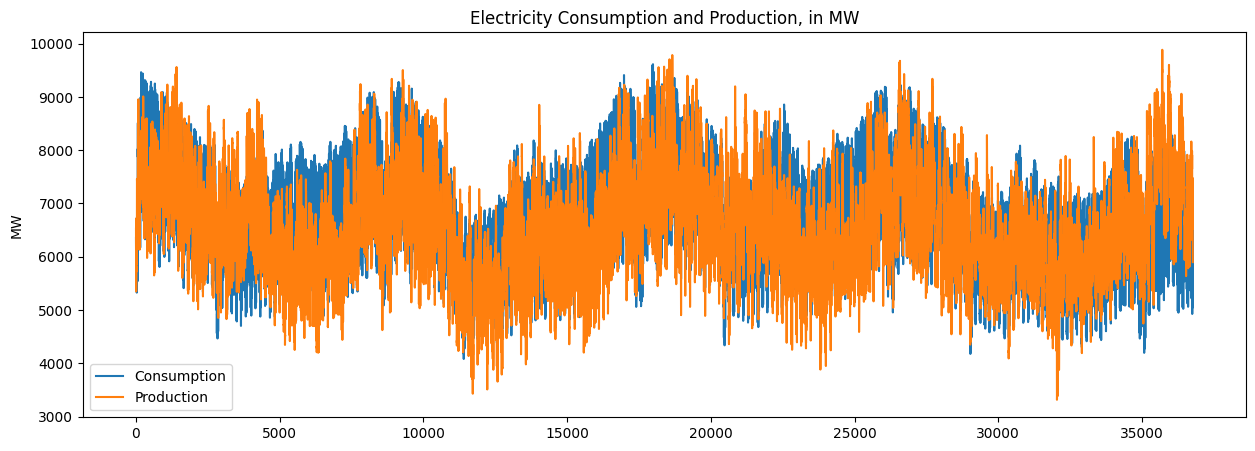

In [ ]:
df[["Consumption", "Production"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.ylabel('MW')
plt.show()

Total production and thier percentages for renewable and non-renewable sources for each year

In [ ]:
renewable_sources = ['Wind', 'Hydroelectric', 'Solar', 'Biomass']
non_renewable_sources = ['Nuclear', 'OilandGas', 'Coal']
# Calculate total production for renewable and non-renewable sources for each year
yearly_total_renewable = df.groupby(df['DateTime'].dt.year)[renewable_sources].sum()
yearly_total_non_renewable = df.groupby(df['DateTime'].dt.year)[non_renewable_sources].sum()

# Calculate percentage contribution of renewable and non-renewable sources for each year
yearly_percentage_renewable = (yearly_total_renewable.div(yearly_total_renewable.sum(axis=1), axis=0)) * 100
yearly_percentage_non_renewable = (yearly_total_non_renewable.div(yearly_total_non_renewable.sum(axis=1), axis=0)) * 100

# Display numerical values of production and percentage contribution for each year
for year in df['DateTime'].dt.year.unique():
    print(f"Year: {year}")
    print("Renewable Energy Production:")
    print(yearly_total_renewable.loc[year])
    print("Percentage Contribution of Renewable Energy:")
    print(yearly_percentage_renewable.loc[year])
    print("Non-Renewable Energy Production:")
    print(yearly_total_non_renewable.loc[year])
    print("Percentage Contribution of Non-Renewable Energy:")
    print(yearly_percentage_non_renewable.loc[year])
    print("=" * 50)

Year: 2019
Renewable Energy Production:
Wind              6692201
Hydroelectric    15666624
Solar             1377855
Biomass            430290
Name: 2019, dtype: int64
Percentage Contribution of Renewable Energy:
Wind             27.691519
Hydroelectric    64.826596
Solar             5.701397
Biomass           1.780488
Name: 2019, dtype: float64
Non-Renewable Energy Production:
Nuclear      11283025
OilandGas     9317685
Coal         13856141
Name: 2019, dtype: int64
Percentage Contribution of Non-Renewable Energy:
Nuclear      32.745375
OilandGas    27.041603
Coal         40.213022
Name: 2019, dtype: float64
Year: 2020
Renewable Energy Production:
Wind              6897641
Hydroelectric    15432767
Solar             1352381
Biomass            478143
Name: 2020, dtype: int64
Percentage Contribution of Renewable Energy:
Wind             28.548737
Hydroelectric    63.874883
Solar             5.597388
Biomass           1.978992
Name: 2020, dtype: float64
Non-Renewable Energy Production:


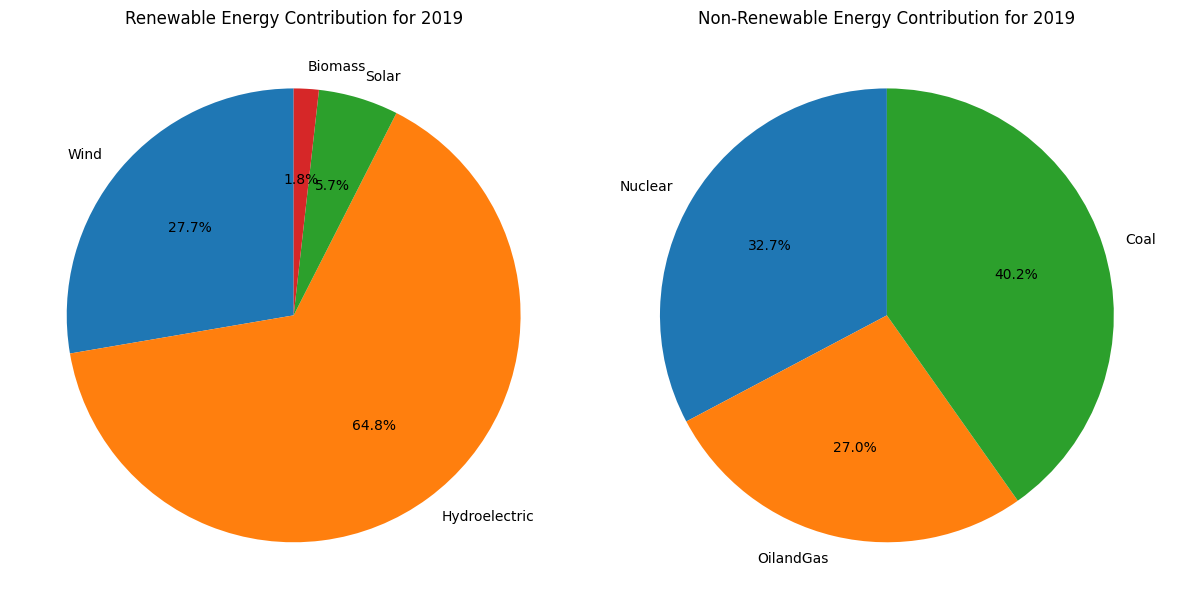

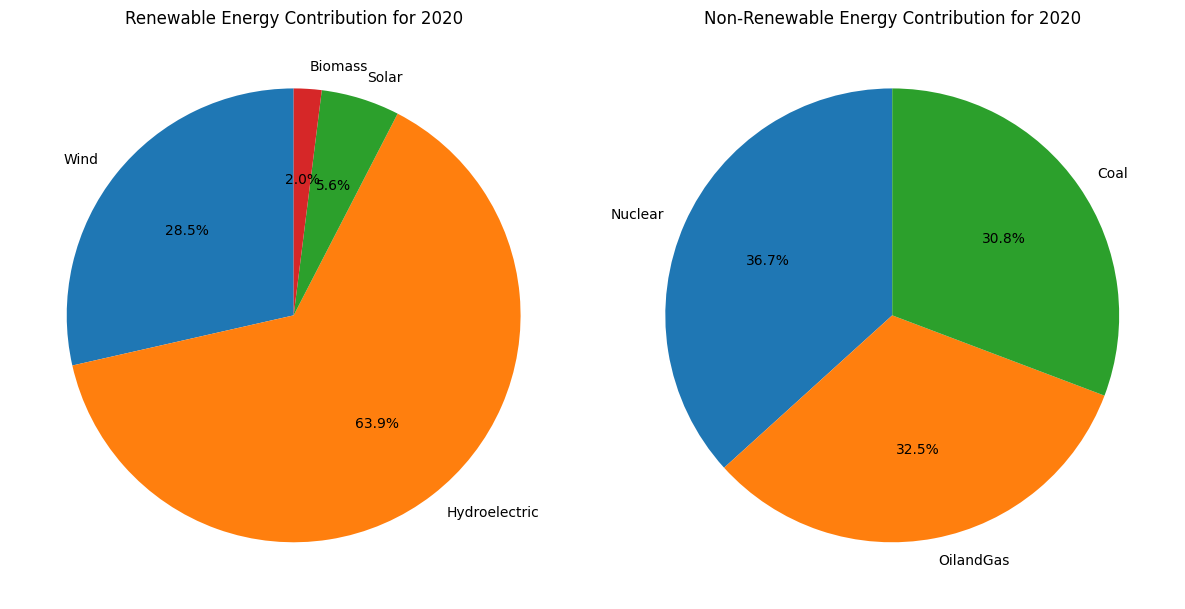

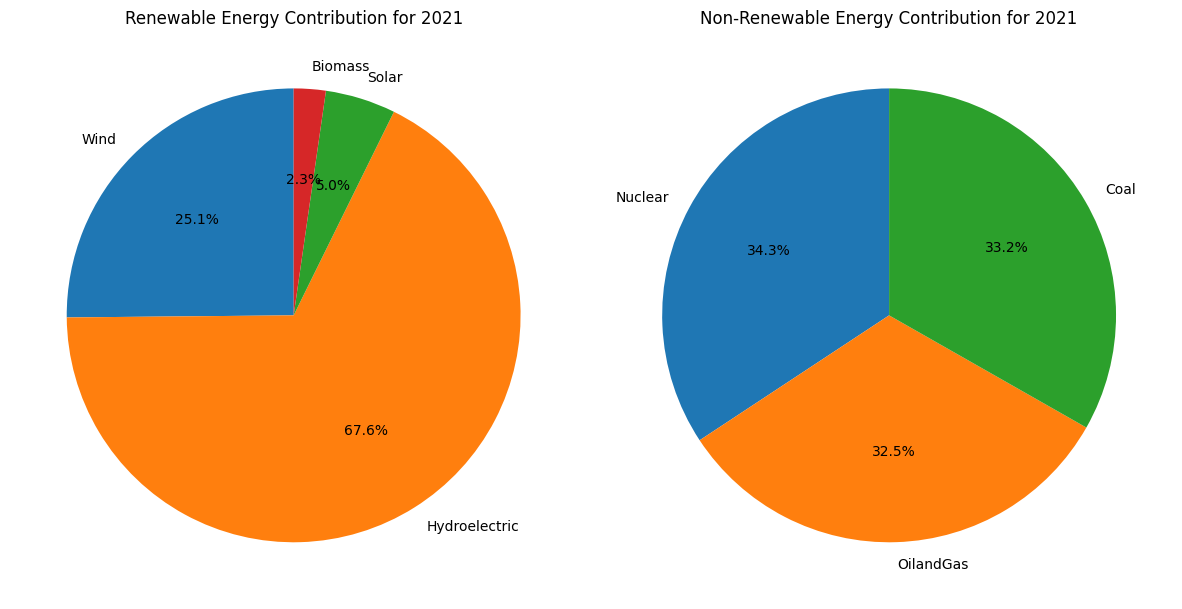

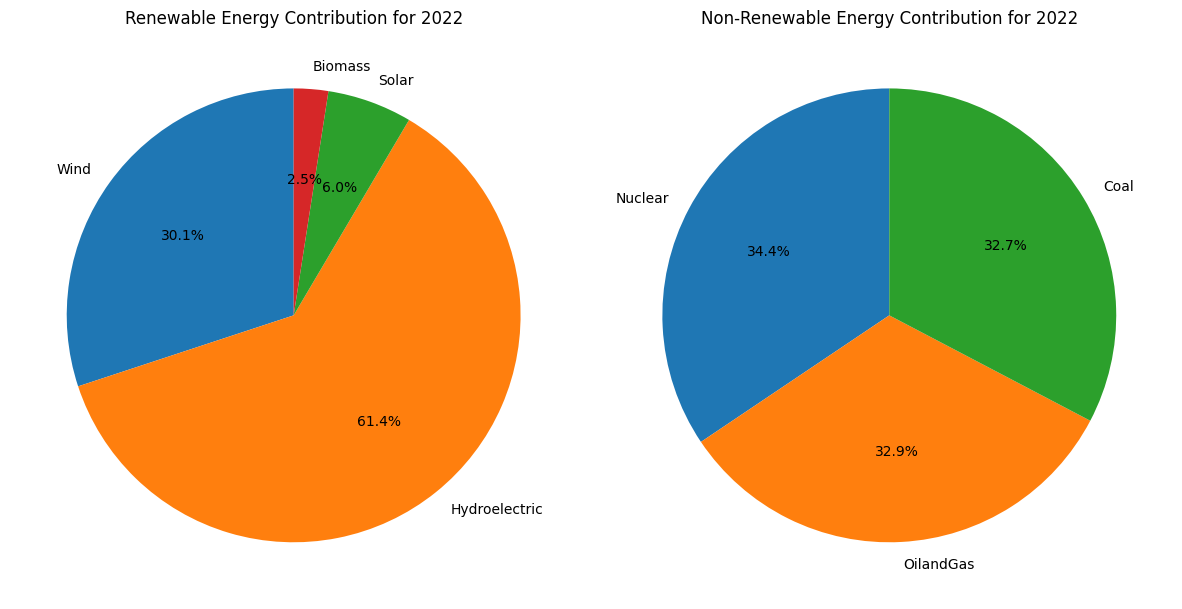

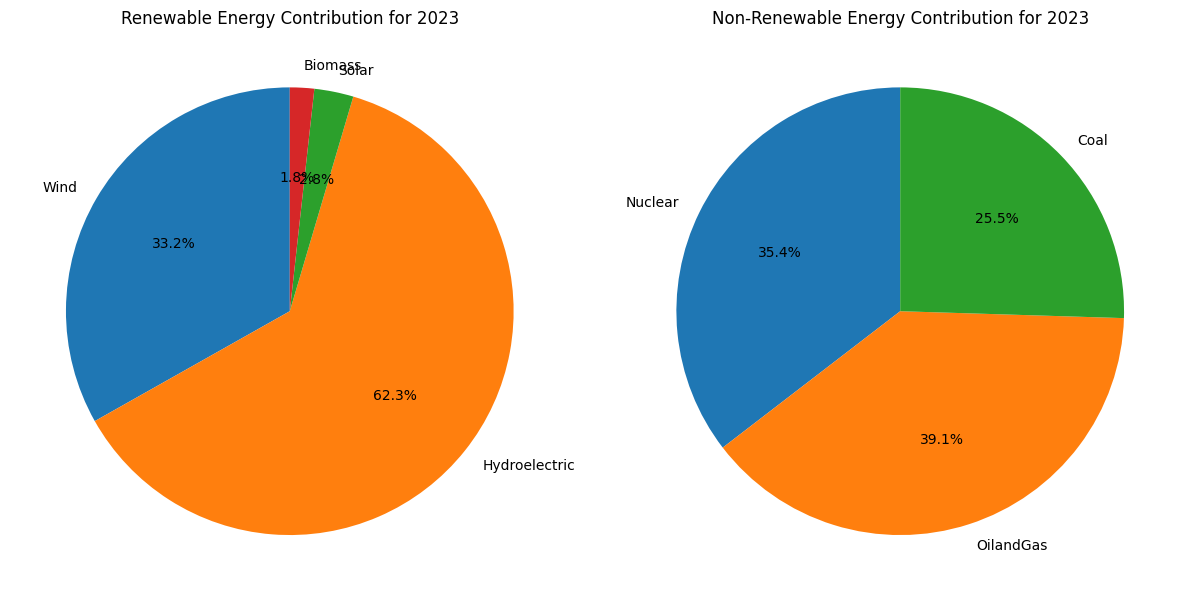

In [ ]:
# Define renewable and non-renewable energy sources
renewable_sources = ['Wind', 'Hydroelectric', 'Solar', 'Biomass']
non_renewable_sources = ['Nuclear', 'OilandGas', 'Coal']

# Calculate total production for renewable and non-renewable sources for each year
yearly_total_renewable = df.groupby(df['DateTime'].dt.year)[renewable_sources].sum()
yearly_total_non_renewable = df.groupby(df['DateTime'].dt.year)[non_renewable_sources].sum()

# Calculate percentage contribution of renewable and non-renewable sources for each year
yearly_percentage_renewable = (yearly_total_renewable.div(yearly_total_renewable.sum(axis=1), axis=0)) * 100
yearly_percentage_non_renewable = (yearly_total_non_renewable.div(yearly_total_non_renewable.sum(axis=1), axis=0)) * 100

# Plot pie charts for percentage contribution of renewable and non-renewable sources for each year
for year in df['DateTime'].dt.year.unique():
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.pie(yearly_percentage_renewable.loc[year], labels=renewable_sources, autopct='%1.1f%%', startangle=90)
    plt.title(f'Renewable Energy Contribution for {year}')

    plt.subplot(1, 2, 2)
    plt.pie(yearly_percentage_non_renewable.loc[year], labels=non_renewable_sources, autopct='%1.1f%%', startangle=90)
    plt.title(f'Non-Renewable Energy Contribution for {year}')

    plt.tight_layout()
    plt.show()

Contribution of Each Energy Source to Overall Production

Wind             28901096
Hydroelectric    66248551
Solar             5571844
Biomass           2159650
Nuclear          47563427
OilandGas        43450899
Coal             46701846
dtype: int64


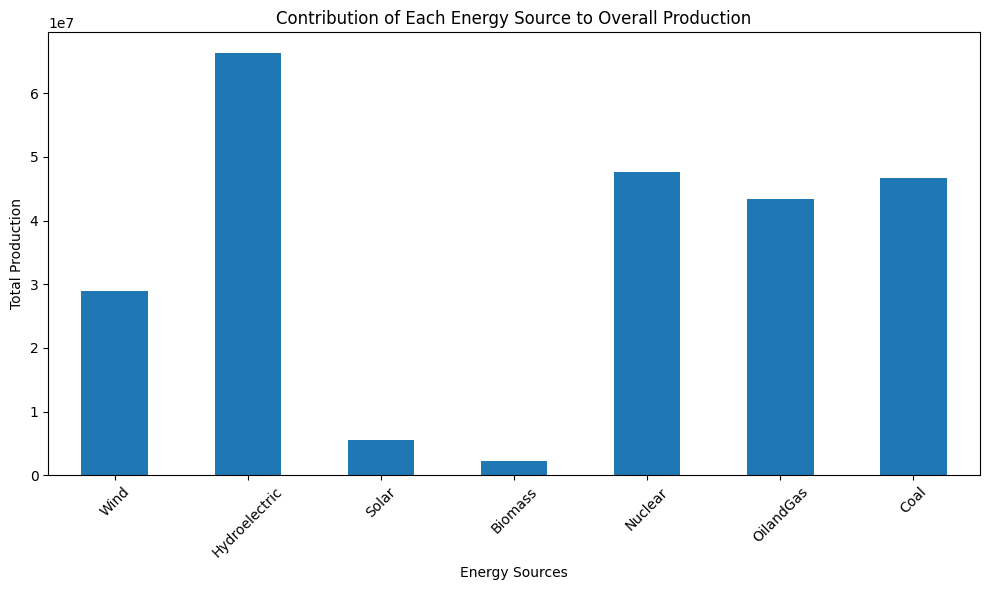

In [ ]:
# total production for each energy source
energy_sources = ['Wind', 'Hydroelectric', 'Solar', 'Biomass', 'Nuclear', 'OilandGas', 'Coal']
total_production = df[energy_sources].sum()
print(total_production)

plt.figure(figsize=(10, 6))
total_production.plot(kind='bar')
plt.title('Contribution of Each Energy Source to Overall Production')
plt.xlabel('Energy Sources')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Percentage contribution for electricity production from renewable and non-renewable sources for each year

             Wind  Hydroelectric    Solar  Biomass
DateTime                                          
2019      6692201       15666624  1377855   430290
2020      6897641       15432767  1352381   478143
2021      6496442       17455342  1294143   587656
2022      6887974       14077507  1383189   561798
2023      1926838        3616311   164276   101763
           Nuclear  OilandGas      Coal
DateTime                               
2019      11283025    9317685  13856141
2020      11488605   10176796   9623010
2021      11307834   10718906  10962525
2022      11112946   10622246  10554229
2023       2371017    2615266   1705941


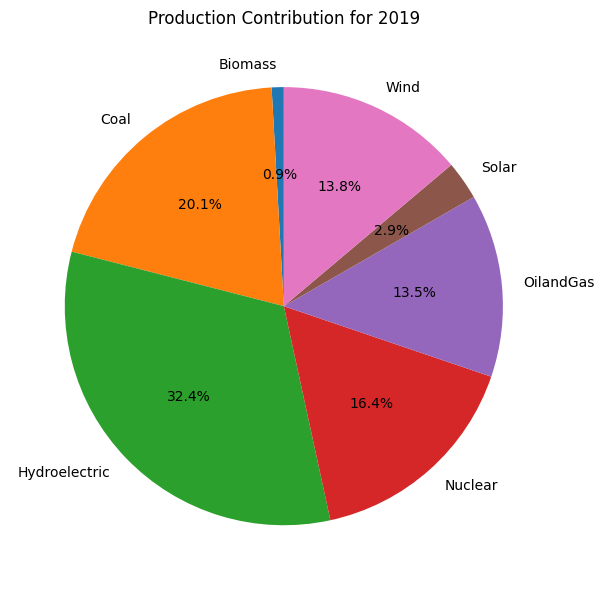

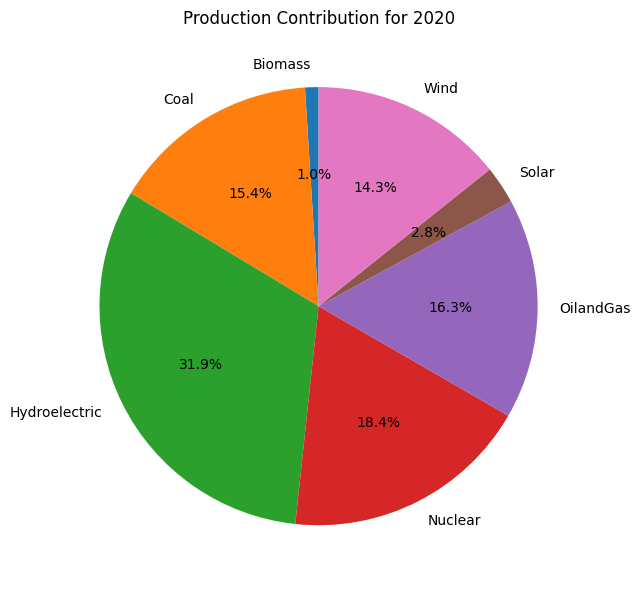

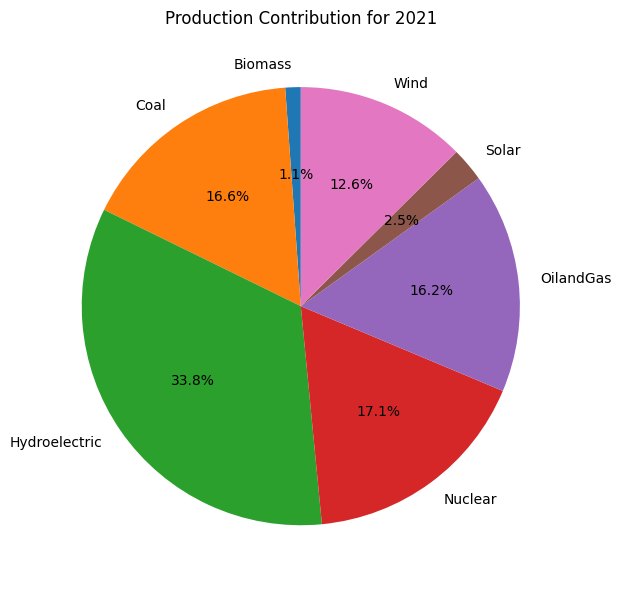

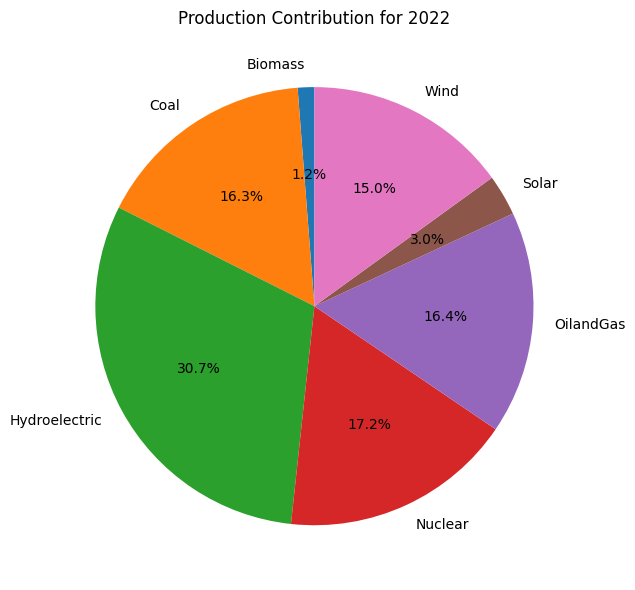

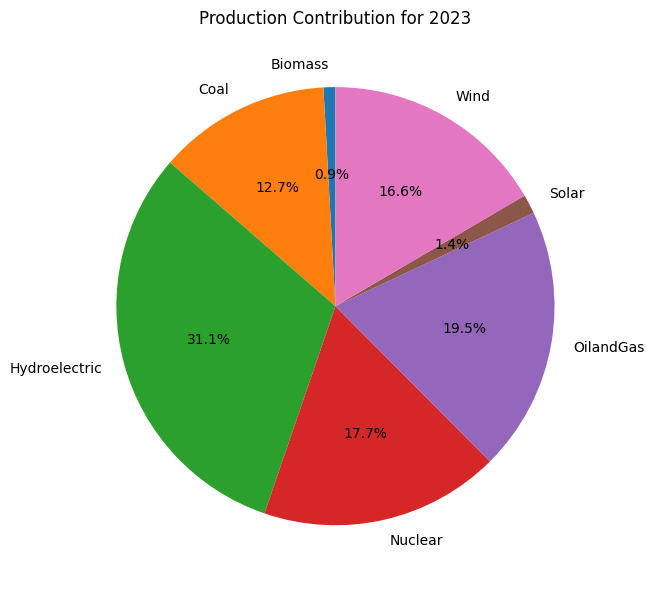

In [ ]:
renewable_sources = ['Wind', 'Hydroelectric', 'Solar', 'Biomass']
non_renewable_sources = ['Nuclear', 'OilandGas', 'Coal']
# total production for renewable and non-renewable sources for each year
yearly_total_renewable = df.groupby(df['DateTime'].dt.year)[renewable_sources].sum()
yearly_total_non_renewable = df.groupby(df['DateTime'].dt.year)[non_renewable_sources].sum()
print(yearly_total_renewable)
print(yearly_total_non_renewable)

# percentage contribution of renewable and non-renewable sources for each year
yearly_percentage_renewable = (yearly_total_renewable.div(yearly_total_renewable.sum(axis=1), axis=0)) * 100
yearly_percentage_non_renewable = (yearly_total_non_renewable.div(yearly_total_non_renewable.sum(axis=1), axis=0)) * 100
# percentages of renewable and non-renewable sources for each year
combined_percentage = yearly_percentage_renewable.add(yearly_percentage_non_renewable, fill_value=0)

for year in df['DateTime'].dt.year.unique():
    plt.figure(figsize=(8, 6))

    plt.pie(combined_percentage.loc[year], labels=combined_percentage.columns, autopct='%1.1f%%', startangle=90)
    plt.title(f'Production Contribution for {year}')

    plt.tight_layout()
    plt.show()

Contribution from the each energy source to the overall Electricity production

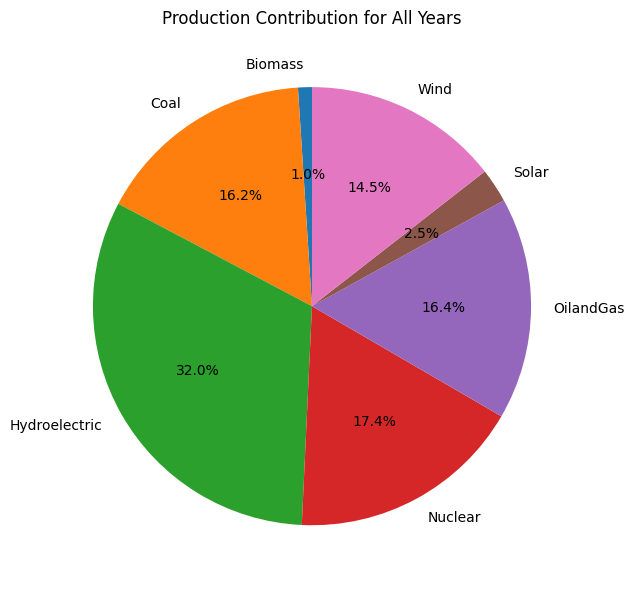

In [ ]:
total_combined_percentage = combined_percentage.sum()

plt.figure(figsize=(8, 6))

plt.pie(total_combined_percentage, labels=total_combined_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Production Contribution for All Years')

plt.tight_layout()
plt.show()

Year with maxium percentage contribution for each energy sources: Renewable and Non-Renewable

In [ ]:
# Calculate total production for renewable and non-renewable sources for each year
yearly_total_renewable = df.groupby(df['DateTime'].dt.year)[renewable_sources].sum()
yearly_total_non_renewable = df.groupby(df['DateTime'].dt.year)[non_renewable_sources].sum()

# Calculate percentage contribution of renewable and non-renewable sources for each year
yearly_percentage_renewable = (yearly_total_renewable.div(yearly_total_renewable.sum(axis=1), axis=0)) * 100
yearly_percentage_non_renewable = (yearly_total_non_renewable.div(yearly_total_non_renewable.sum(axis=1), axis=0)) * 100

# Find the year with the highest percentage contribution for each energy source (renewable)
print("Year with highest percentage contribution for renewable energy sources:")
for source in renewable_sources:
    max_year_renewable = yearly_percentage_renewable[source].idxmax()
    print(f"{source}: {max_year_renewable} - {yearly_percentage_renewable.loc[max_year_renewable, source]:.2f}%")

# Find the year with the highest percentage contribution for each energy source (non-renewable)
print("\nYear with highest percentage contribution for non-renewable energy sources:")
for source in non_renewable_sources:
    max_year_non_renewable = yearly_percentage_non_renewable[source].idxmax()
    print(f"{source}: {max_year_non_renewable} - {yearly_percentage_non_renewable.loc[max_year_non_renewable, source]:.2f}%")


Year with highest percentage contribution for renewable energy sources:
Wind: 2023 - 33.17%
Hydroelectric: 2021 - 67.57%
Solar: 2022 - 6.04%
Biomass: 2022 - 2.45%

Year with highest percentage contribution for non-renewable energy sources:
Nuclear: 2020 - 36.72%
OilandGas: 2023 - 39.08%
Coal: 2019 - 40.21%


Year with minimum percentage contribution for each energy sources: Renewable and Non-Renewable

In [ ]:
# lowest percentage contribution for each energy source (renewable)
print("Year with lowest percentage contribution for renewable energy sources:")
for source in renewable_sources:
    min_year_renewable = yearly_percentage_renewable[source].idxmin()
    print(f"{source}: {min_year_renewable} - {yearly_percentage_renewable.loc[min_year_renewable, source]:.2f}%")

# lowest percentage contribution for each energy source (non-renewable)
print("\nYear with lowest percentage contribution for non-renewable energy sources:")
for source in non_renewable_sources:
    min_year_non_renewable = yearly_percentage_non_renewable[source].idxmin()
    print(f"{source}: {min_year_non_renewable} - {yearly_percentage_non_renewable.loc[min_year_non_renewable, source]:.2f}%")


Year with lowest percentage contribution for renewable energy sources:
Wind: 2021 - 25.15%
Hydroelectric: 2022 - 61.45%
Solar: 2023 - 2.83%
Biomass: 2023 - 1.75%

Year with lowest percentage contribution for non-renewable energy sources:
Nuclear: 2019 - 32.75%
OilandGas: 2019 - 27.04%
Coal: 2023 - 25.49%


Scatter plot of the electricity production from each energy source

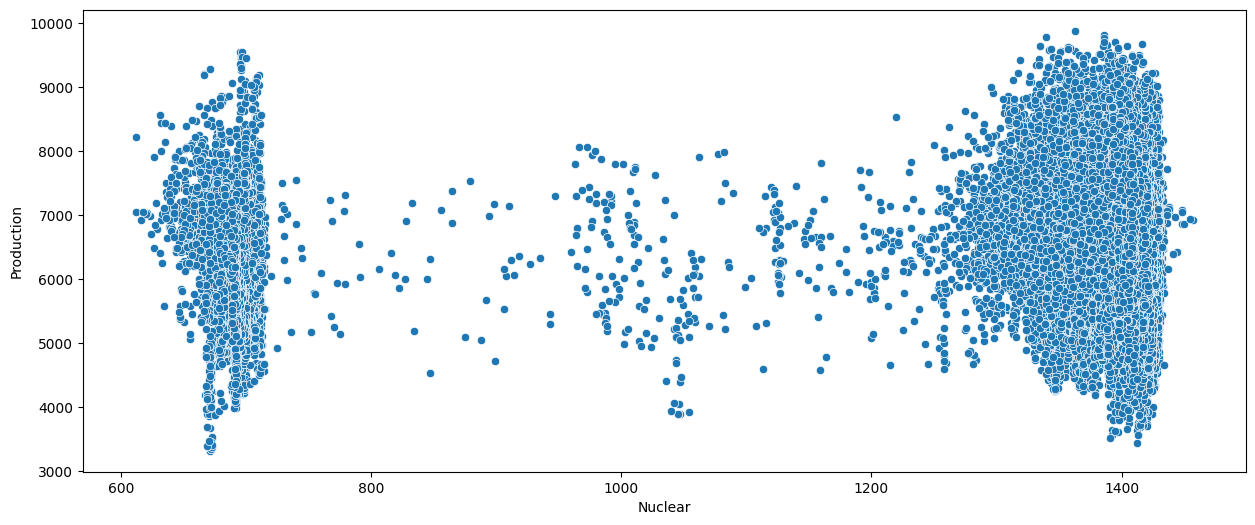

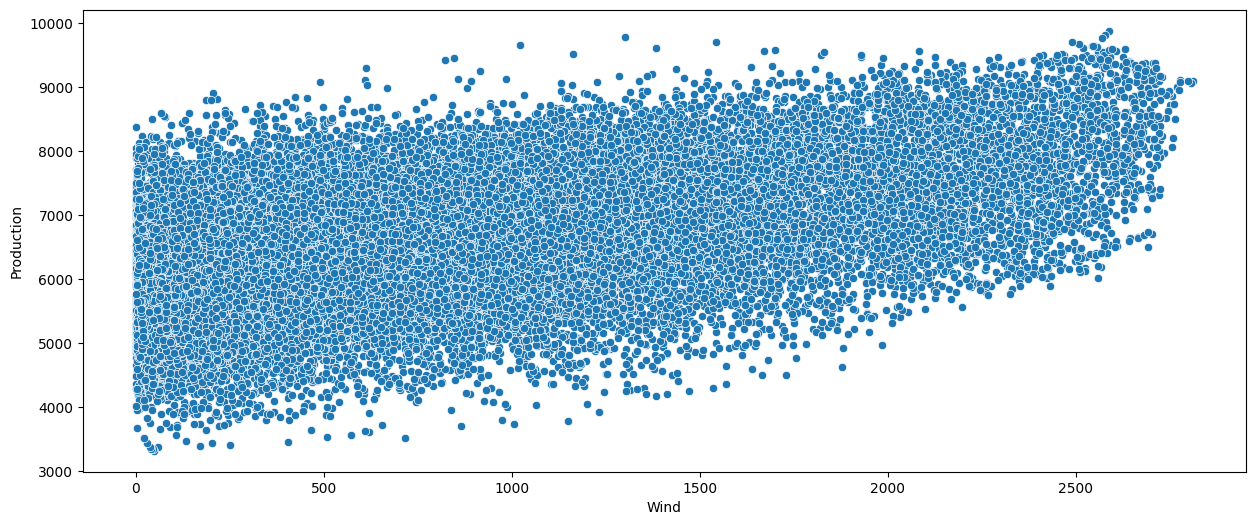

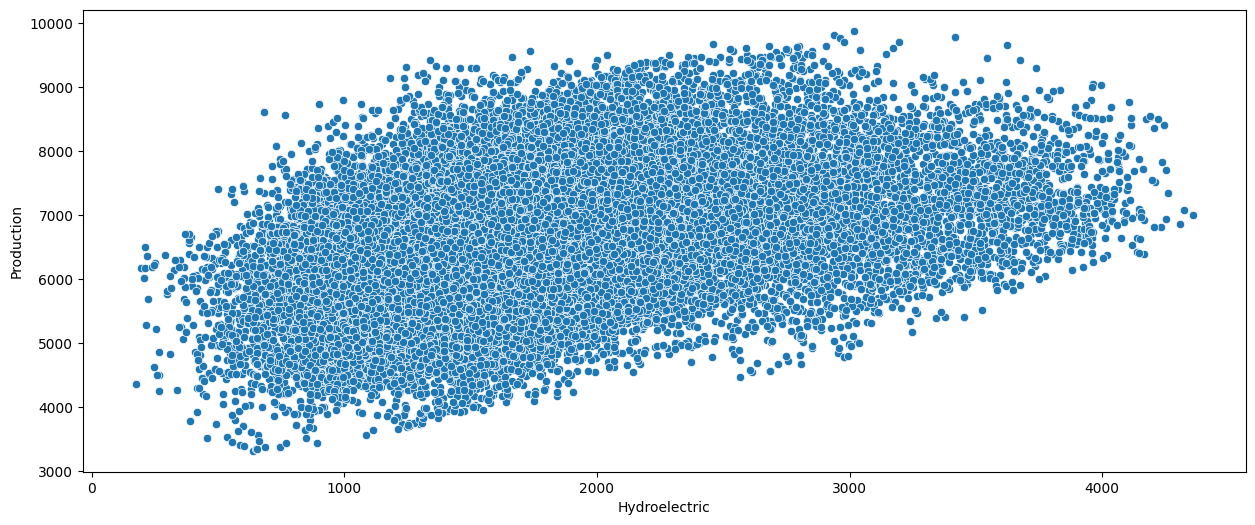

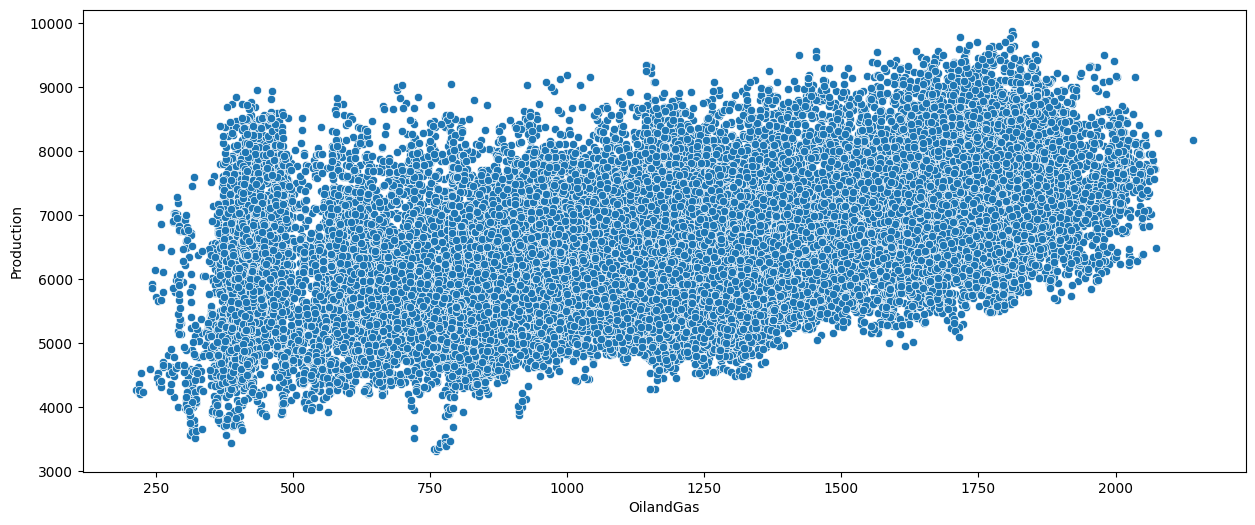

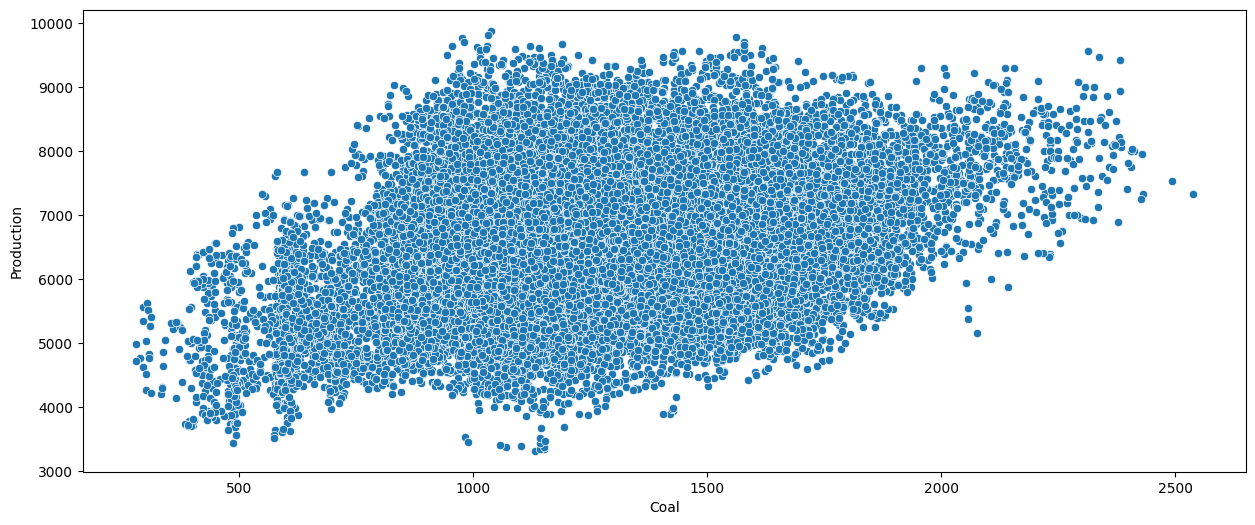

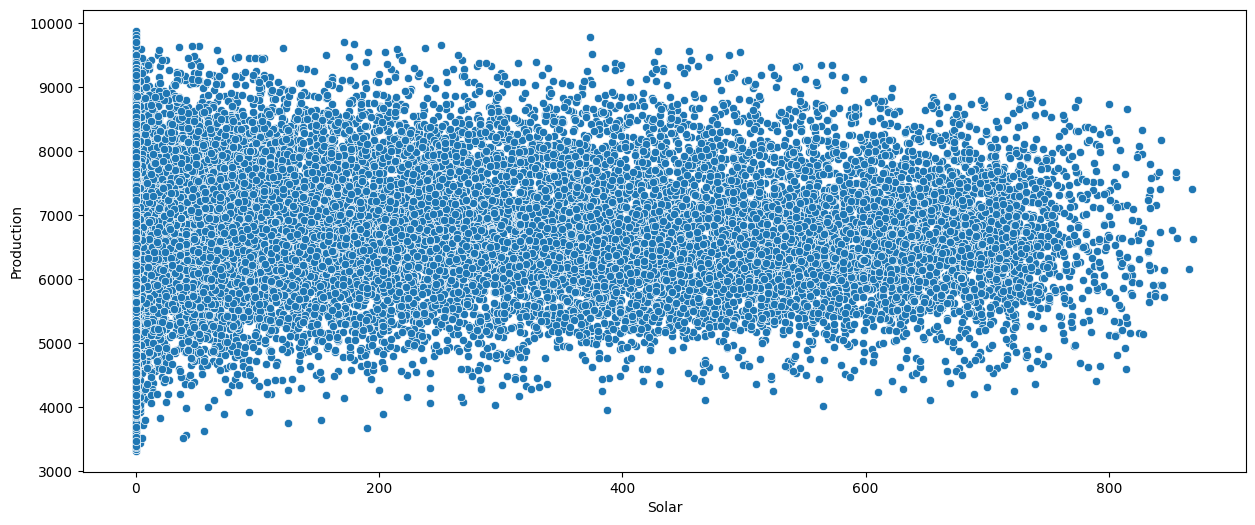

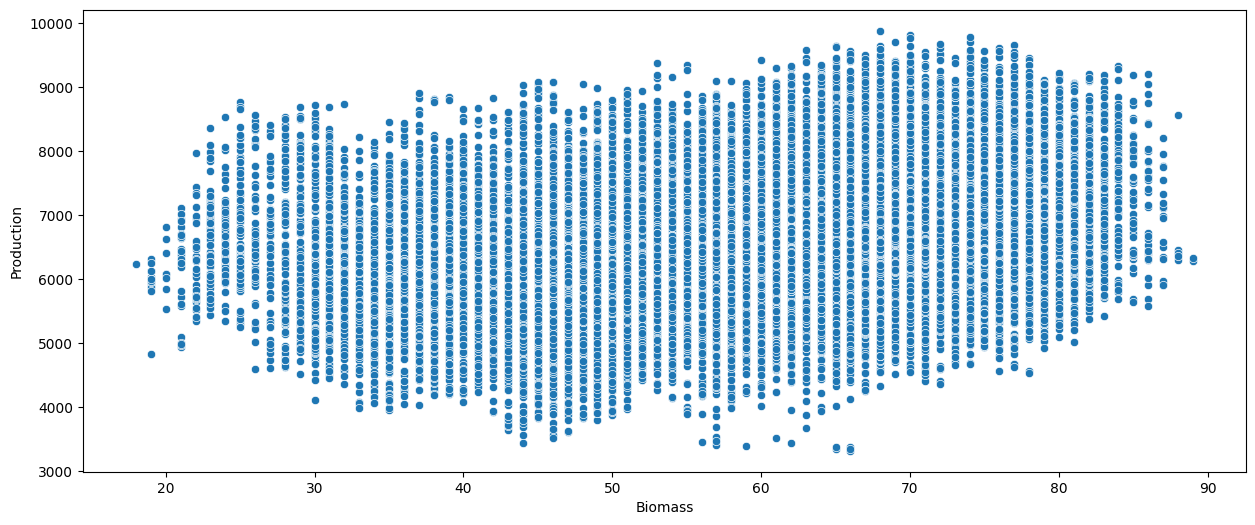

In [ ]:
for i in ['Nuclear','Wind','Hydroelectric','OilandGas','Coal','Solar','Biomass']:
    plt.figure(figsize=(15,6))
    sns.scatterplot(data=df,y='Production',x=i)
    plt.show()

## *Bayesian model for predictions of Consumption and Production from Renewable sources with highest percentage of power generation*

To make informed decisions regarding the amount of electricity to produce from non-renewable sources, it's important to consider the predictive consumption and production from renewable sources which are Hydroelectric and Wind. When comparing these significant contributors Hydroelectric and Wind to smaller contributors like solar and biomass, which collectively account for only 2-3% of the overall production each year.


## *Bayesian model for Electricity Consumption*

In [ ]:
import pymc as pm
from scipy.stats.distributions import gamma
import arviz as az

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  41.604  0.314  41.015   42.188      0.015    0.011     419.0     384.0   
beta    0.006  0.000   0.006    0.006      0.000    0.000     418.0     415.0   

       r_hat  
alpha   1.01  
beta    1.01  


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

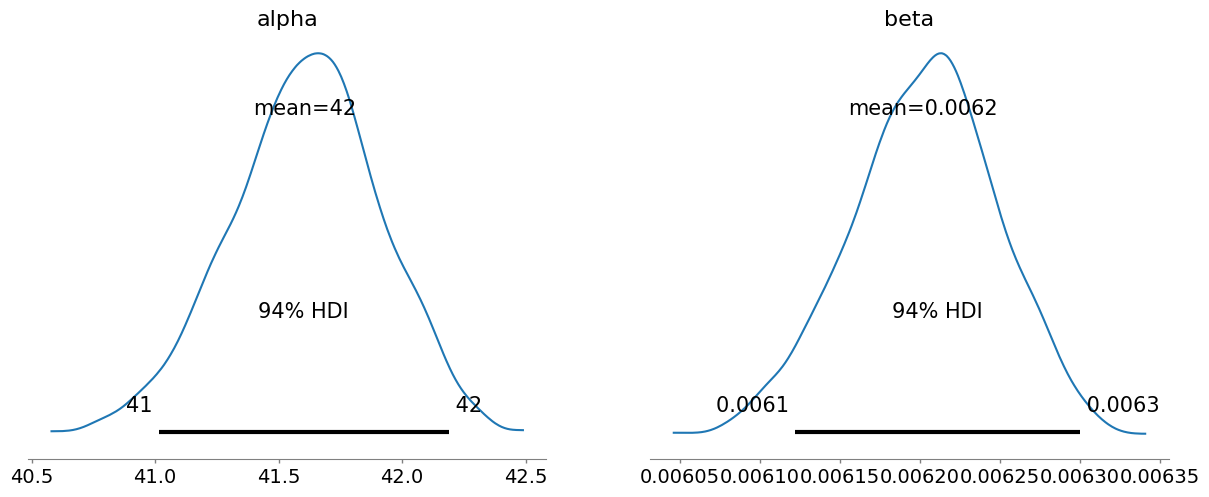

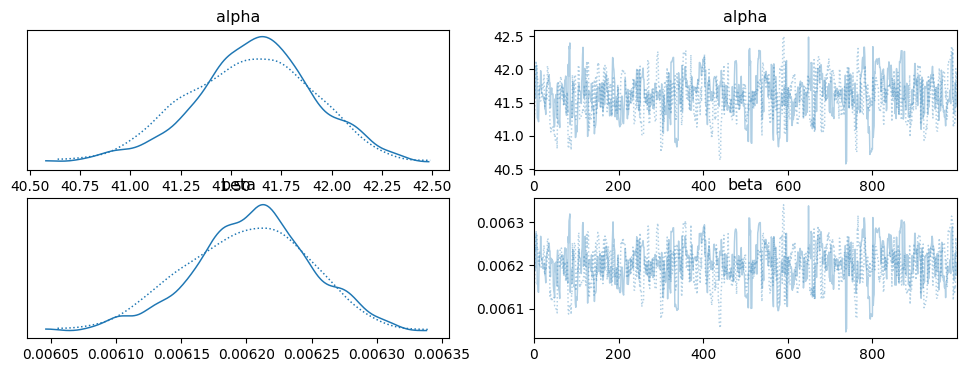

In [ ]:
with pm.Model() as consumption_model:
    # Prior distribution for parameters of the gamma distribution
    expalpha = pm.Exponential('alpha', 1)
    expbeta = pm.Exponential('beta', 1)

    # Likelihood (gamma distribution)
    consumption = pm.Gamma('consumption', alpha=expalpha, beta=expbeta, observed=df.Consumption)

with consumption_model:
  trace = pm.sample(1000, tune=1000)

# Plot posterior distributions
az.plot_posterior(trace.posterior)

# Summarize the trace
print(pm.summary(trace))
az.plot_trace(trace)

In [ ]:
print(pm.summary(trace))

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  41.604  0.314  41.015   42.188      0.015    0.011     419.0     384.0   
beta    0.006  0.000   0.006    0.006      0.000    0.000     418.0     415.0   

       r_hat  
alpha   1.01  
beta    1.01  


In [ ]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [ ]:
alpha = trace.posterior['alpha'].mean()
beta = trace.posterior['beta'].mean()
alpha, beta

(<xarray.DataArray 'alpha' ()>
 array(41.60384088),
 <xarray.DataArray 'beta' ()>
 array(0.0062022))

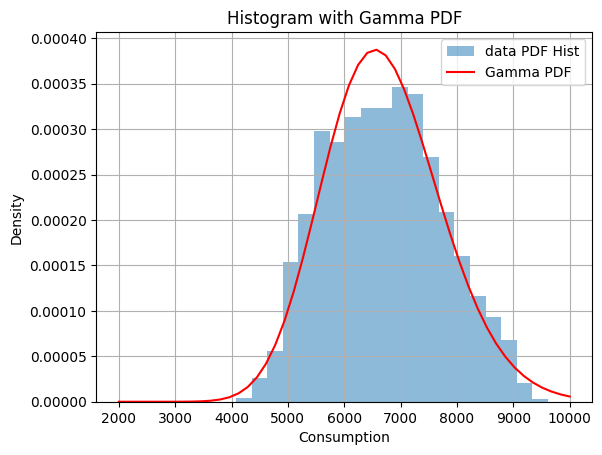

In [ ]:
alpha = trace.posterior['alpha'].values.mean()
beta = trace.posterior['beta'].values.mean()
df.Consumption.hist(density=True, bins=20, alpha=0.5, label='data PDF Hist')
x = np.linspace(2000, 10000)
plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), 'r-', label='Gamma PDF')
plt.legend()
plt.xlabel('Consumption')
plt.ylabel('Density')
plt.title('Histogram with Gamma PDF')
plt.grid(True)
plt.show()

In [ ]:
with consumption_model:
    #pp_trace = pm.sample_ppc(trace)
    pp_trace = pm.sample_posterior_predictive(trace)

In [ ]:
pp_trace.posterior_predictive['consumption'].shape

(2, 1000, 36772)

In [ ]:
posterior_consumption = pp_trace.posterior_predictive['consumption'][1][500]

In [ ]:
posterior_consumption

<xarray.DataArray 'consumption' (consumption_dim_2: 36772)>
array([7338.03599281, 6606.36277645, 5525.67037709, ..., 7905.36337883,
       6997.72673362, 9974.25574903])
Coordinates:
    chain              int64 1
    draw               int64 500
  * consumption_dim_2  (consumption_dim_2) int64 0 1 2 3 ... 36769 36770 36771

In [ ]:
posterior_consumption_df = posterior_consumption.to_dataframe()

posterior_consumption_df

chain  draw  consumption
consumption_dim_2                          
0                      1   500  7338.035993
1                      1   500  6606.362776
2                      1   500  5525.670377
3                      1   500  6432.469530
4                      1   500  6083.360850
...                  ...   ...          ...
36767                  1   500  6156.812516
36768                  1   500  5848.841891
36769                  1   500  7905.363379
36770                  1   500  6997.726734
36771                  1   500  9974.255749

[36772 rows x 3 columns]

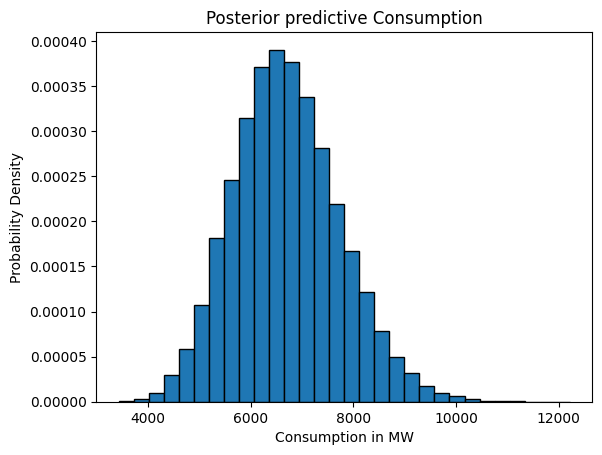

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'consumption' is the column you want to plot
consumption_column = posterior_consumption_df['consumption']

# Plotting histogram with density normalization
plt.hist(consumption_column, bins=30, edgecolor='black', density=True)
plt.title('Posterior predictive Consumption')
plt.xlabel('Consumption in MW')
plt.ylabel('Probability Density')
plt.show()

In [ ]:
def meanAbsolutErrorAaPercentage(real, predicted):
    real = np.array(real)
    predicted = np.array(predicted)

    return np.mean(np.abs((real - predicted) / real)) * 100

In [ ]:
dfReal = df["Consumption"]
dfPredicted = posterior_consumption_df["consumption"]

print(f"percentage error: {meanAbsolutErrorAaPercentage(dfReal, dfPredicted):.4f}")

percentage error: 17.8927


## *Bayesian model for Hydroelectric production*

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  7.121  0.056   7.017    7.232      0.003    0.002     309.0     349.0   
beta   0.004  0.000   0.004    0.004      0.000    0.000     306.0     346.0   

       r_hat  
alpha   1.01  
beta    1.01  


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

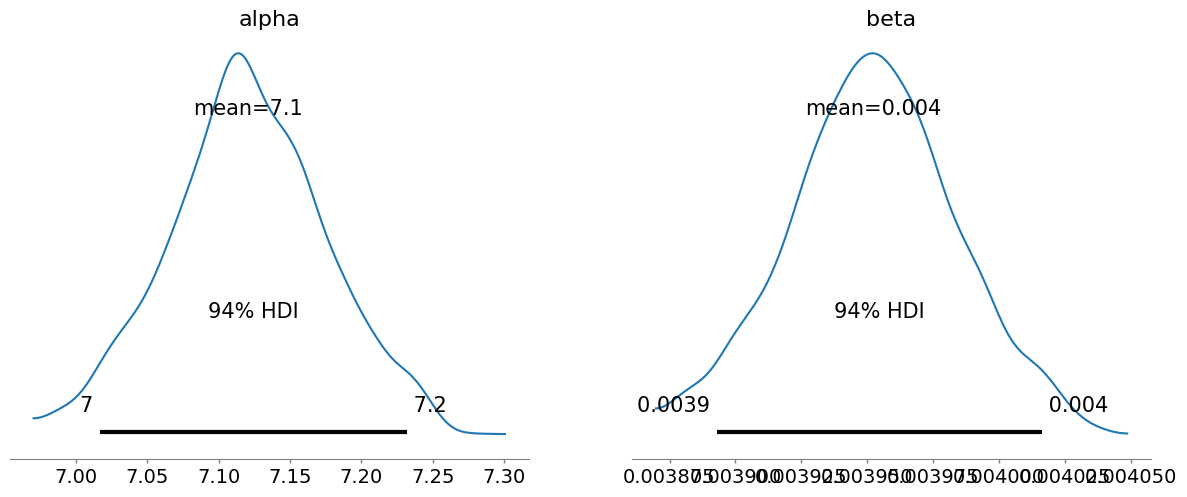

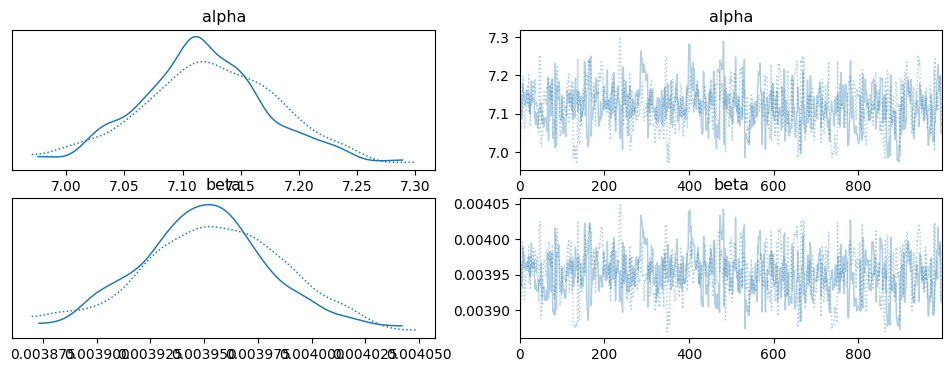

In [ ]:
# Define the PyMC model
with pm.Model() as Hydroelectric_production_model:
    # Prior distribution for parameters of the gamma distribution
    expalpha = pm.Exponential('alpha', 1)
    expbeta = pm.Exponential('beta', 1)

    # Likelihood (gamma distribution)
    Hydroelectric_production = pm.Gamma('Hydroelectric_production', alpha=expalpha, beta=expbeta, observed=df.Hydroelectric)

with Hydroelectric_production_model:
  trace = pm.sample(1000, tune=1000)

# Plot posterior distributions
az.plot_posterior(trace.posterior)

# Summarize the trace
print(pm.summary(trace))
az.plot_trace(trace)

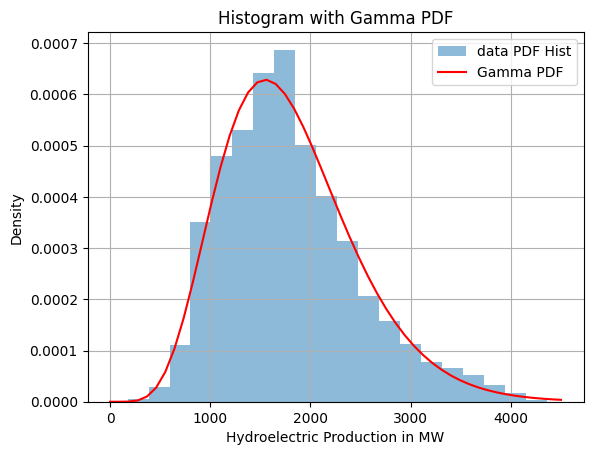

In [ ]:
alpha = trace.posterior['alpha'].mean()
beta = trace.posterior['beta'].mean()
df.Hydroelectric.hist(density=True, bins=20, alpha=0.5, label='data PDF Hist')
x = np.linspace(0, 4500)
plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), 'r-', label='Gamma PDF')
plt.legend()
plt.xlabel('Hydroelectric Production in MW')
plt.ylabel('Density')
plt.title('Histogram with Gamma PDF')
plt.grid(True)
plt.show()

In [ ]:
with Hydroelectric_production_model:
    #pp_trace = pm.sample_ppc(trace)
    pp_trace = pm.sample_posterior_predictive(trace)

In [ ]:
pp_trace.posterior_predictive['Hydroelectric_production'].shape

(2, 1000, 36772)

In [ ]:
posterior_Hydroelectric_production = pp_trace.posterior_predictive['Hydroelectric_production'][1][500]

In [ ]:
posterior_Hydroelectric_production

<xarray.DataArray 'Hydroelectric_production' (
                                              Hydroelectric_production_dim_2: 36772)>
array([2013.32984486, 1889.92518472, 1160.37534503, ..., 2433.33368386,
       1206.19406522, 2521.10534164])
Coordinates:
    chain                           int64 1
    draw                            int64 500
  * Hydroelectric_production_dim_2  (Hydroelectric_production_dim_2) int64 0 ...

In [ ]:
posterior_Hydroelectric_production_df = posterior_Hydroelectric_production.to_dataframe()

posterior_Hydroelectric_production_df

chain  draw  Hydroelectric_production
Hydroelectric_production_dim_2                                       
0                                   1   500               2013.329845
1                                   1   500               1889.925185
2                                   1   500               1160.375345
3                                   1   500               1762.840781
4                                   1   500               3125.588543
...                               ...   ...                       ...
36767                               1   500               2770.733135
36768                               1   500               1565.840546
36769                               1   500               2433.333684
36770                               1   500               1206.194065
36771                               1   500               2521.105342

[36772 rows x 3 columns]

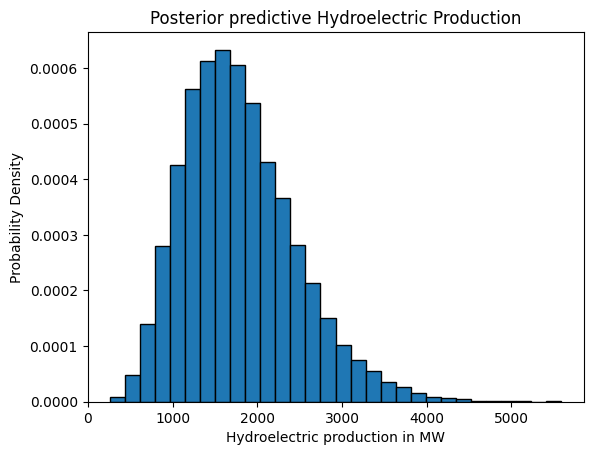

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'consumption' is the column you want to plot
Hydroelectric_production_column = posterior_Hydroelectric_production_df['Hydroelectric_production']

# Plotting histogram with density normalization
plt.hist(Hydroelectric_production_column, bins=30, edgecolor='black', density=True)
plt.title('Posterior predictive Hydroelectric Production')
plt.xlabel('Hydroelectric production in MW')
plt.ylabel('Probability Density')
plt.show()

## *Bayesian model for Electricity production from Wind energy*

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  1.018  0.007   1.006    1.031        0.0      0.0     600.0     883.0   
beta   0.001  0.000   0.001    0.001        0.0      0.0     547.0     755.0   

       r_hat  
alpha   1.00  
beta    1.01  


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

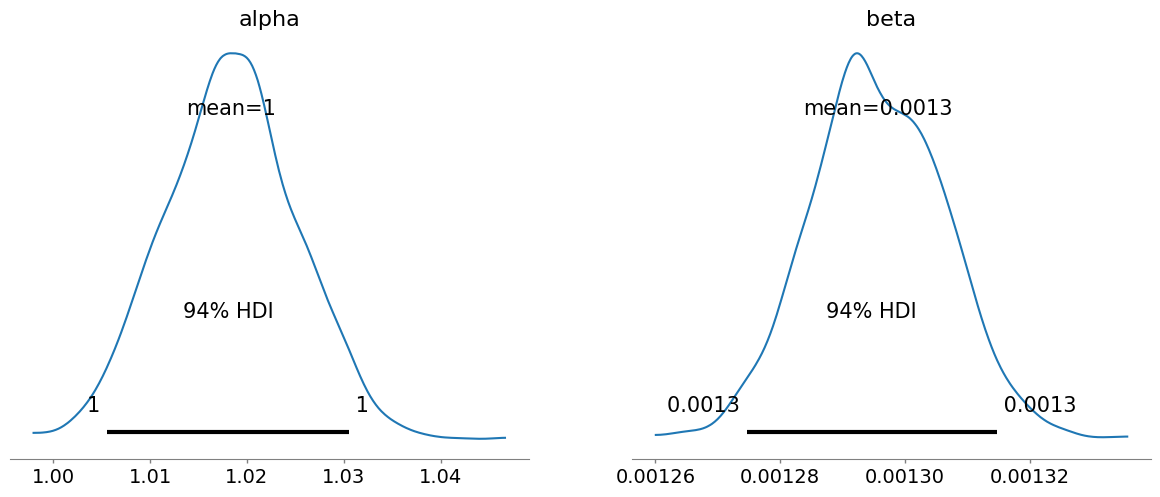

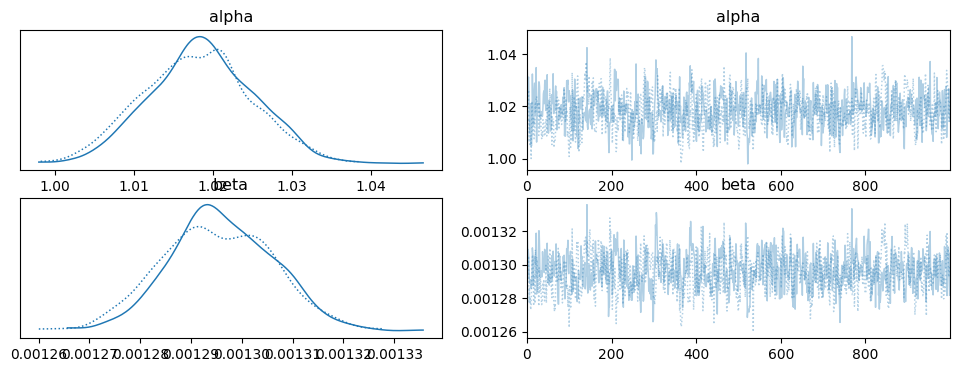

In [ ]:
# Define the PyMC model
with pm.Model() as Wind_production_model:
    # Prior distribution for parameters of the gamma distribution
    expalpha = pm.Exponential('alpha', 1)
    expbeta = pm.Exponential('beta', 1)

    # Likelihood
    Wind_production = pm.Gamma('Wind_production', alpha=expalpha, beta=expbeta, observed=df.Wind)

with Wind_production_model:
  trace = pm.sample(1000, tune=1000)

# Plot posterior distributions
az.plot_posterior(trace.posterior)

# Summarize the trace
print(pm.summary(trace))
az.plot_trace(trace)

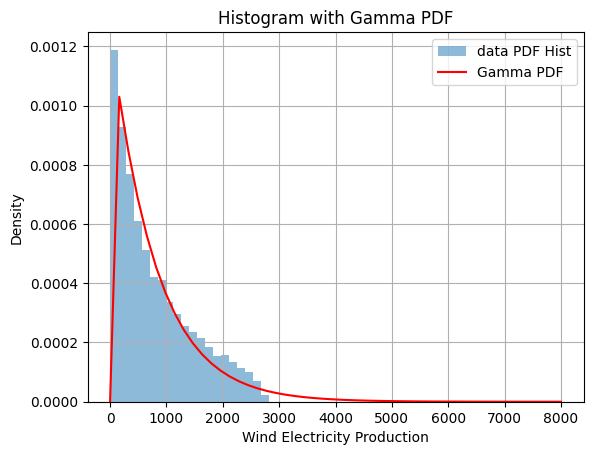

In [ ]:
alpha = trace.posterior['alpha'].mean()
beta = trace.posterior['beta'].mean()
df.Wind.hist(density=True, bins=20, alpha=0.5, label='data PDF Hist')
x = np.linspace(0, 8000)
plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), 'r-', label='Gamma PDF')
plt.legend()
plt.xlabel('Wind Electricity Production')
plt.ylabel('Density')
plt.title('Histogram with Gamma PDF')
plt.grid(True)
plt.show()

In [ ]:
with Wind_production_model:
    #pp_trace = pm.sample_ppc(trace)
    pp_trace = pm.sample_posterior_predictive(trace)

In [ ]:
pp_trace.posterior_predictive['Wind_production'].shape

(2, 1000, 36772)

In [ ]:
posterior_Wind_production = pp_trace.posterior_predictive['Wind_production'][1][500]

In [ ]:
posterior_Wind_production

<xarray.DataArray 'Wind_production' (Wind_production_dim_2: 36772)>
array([250.85744235,  86.53726071,  68.72964142, ..., 183.93028464,
       277.6367058 ,  67.13825241])
Coordinates:
    chain                  int64 1
    draw                   int64 500
  * Wind_production_dim_2  (Wind_production_dim_2) int64 0 1 2 ... 36770 36771

In [ ]:
posterior_Wind_production_df = posterior_Wind_production.to_dataframe()
posterior_Wind_production_df

chain  draw  Wind_production
Wind_production_dim_2                              
0                          1   500       250.857442
1                          1   500        86.537261
2                          1   500        68.729641
3                          1   500       680.280692
4                          1   500       424.892916
...                      ...   ...              ...
36767                      1   500       701.742258
36768                      1   500       641.168686
36769                      1   500       183.930285
36770                      1   500       277.636706
36771                      1   500        67.138252

[36772 rows x 3 columns]

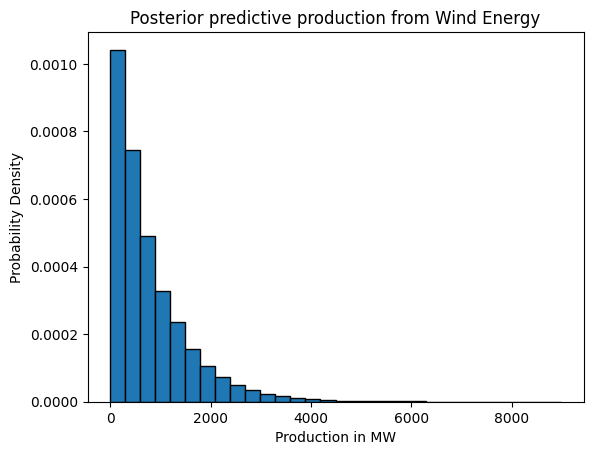

In [ ]:
Wind_production_column = posterior_Wind_production_df['Wind_production']

# Plotting histogram with density normalization
plt.hist(Wind_production_column, bins=30, edgecolor='black', density=True)
plt.title('Posterior predictive production from Wind Energy')
plt.xlabel('Production in MW')
plt.ylabel('Probability Density')
plt.show()

Creating the predictive_df with posterior predictive values of Comsumption and Production from Hydroelectric and Wind for 2024

In [ ]:
predictive_df = pd.DataFrame(pd.date_range(start='2024-01-01', end='2024-12-31', freq='H'), columns=['DateTime'])

predictive_df['Consumption'] = posterior_consumption_df['consumption']
predictive_df['Hydroelectric'] = posterior_Hydroelectric_production_df['Hydroelectric_production']
predictive_df['Wind'] = posterior_Wind_production_df['Wind_production']

predictive_df

DateTime  Consumption  Hydroelectric        Wind
0    2024-01-01 00:00:00  7338.035993    2013.329845  250.857442
1    2024-01-01 01:00:00  6606.362776    1889.925185   86.537261
2    2024-01-01 02:00:00  5525.670377    1160.375345   68.729641
3    2024-01-01 03:00:00  6432.469530    1762.840781  680.280692
4    2024-01-01 04:00:00  6083.360850    3125.588543  424.892916
...                  ...          ...            ...         ...
8756 2024-12-30 20:00:00  7855.779453    3462.733149  590.317048
8757 2024-12-30 21:00:00  6917.420703    1163.809977  659.353964
8758 2024-12-30 22:00:00  7534.375358    1042.031357  518.358609
8759 2024-12-30 23:00:00  7507.292722    1250.021218  312.648811
8760 2024-12-31 00:00:00  7258.559253    1974.852378   88.042167

[8761 rows x 4 columns]

58627874.434385106
15625962.130254282
6894550.305042848


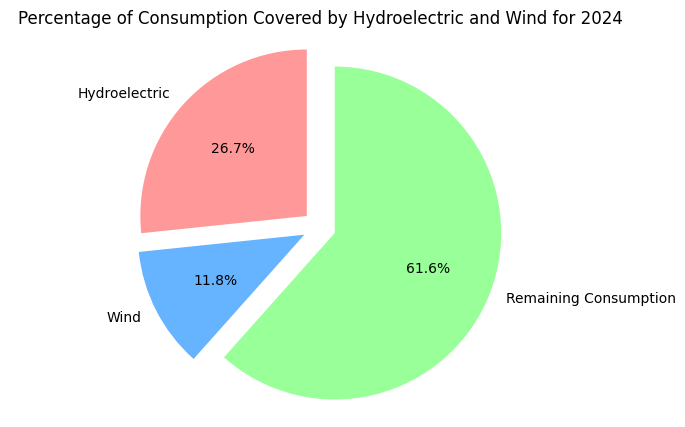

In [ ]:
total_consumption = predictive_df['Consumption'].sum()
print(total_consumption)
# Calculate the total Hydroelectric and Wind production
total_hydroelectric = predictive_df['Hydroelectric'].sum()
total_wind = predictive_df['Wind'].sum()
print(total_hydroelectric)
print(total_wind)
# Calculate percentages in relation to total consumption
hydroelectric_percentage = (total_hydroelectric / total_consumption) * 100
wind_percentage = (total_wind / total_consumption) * 100

# Remaining percentage for Consumption after deducting Hydroelectric and Wind
consumption_remaining = 100 - (hydroelectric_percentage + wind_percentage)

# Pie chart data
labels = ['Hydroelectric', 'Wind', 'Remaining Consumption']
sizes = [hydroelectric_percentage, wind_percentage, consumption_remaining]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

# Plotting the pie chart for Consumption, Hydroelectric, and Wind
plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Consumption Covered by Hydroelectric and Wind for 2024')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
total_consumption = int(predictive_df['Consumption'].sum())
print(f"The total projected consumption is: {total_consumption:,} MW")

# Calculate the total Hydroelectric and Wind production
total_hydroelectric = int(predictive_df['Hydroelectric'].sum())
total_wind = int(predictive_df['Wind'].sum())
print(f"The total projected Hydroelectric production is: {total_hydroelectric:,} MW")
print(f"The total projected Wind production is: {total_wind:,} MW")

The total projected consumption is: 58,627,874 MW
The total projected Hydroelectric production is: 15,625,962 MW
The total projected Wind production is: 6,894,550 MW


# Conclusion

Looking at the consumption predictions for 2024 and biggest contributors among renewable sources which are Hydroelectric and Wind power. Together, they make up 38% of the total energy. Hydroelectric power covers 27%, and Wind power covers 11%.

Predicting electricity consumption and production from highest contributors among renewable sources like hydroelectric and wind power is crucial for informed decision-making in energy generation. By accurately forecasting these factors, it becomes possible to plan and allocate resources effectively.

The accurate prediction of electricity consumption and production from renewable sources like hydroelectric and wind power serves as a cornerstone for informed decision-making in energy management.